# Plotting Basics

A plot is a graphical representation of a data set, showing the relationship between two or more variables. They are useful because we can quickly derive an understanding which would not come from raw lists of values. Inspecting a chart can make large amounts of information easy to digest and interpret.

The main purpose of a chart is to convey information clearly and accurately. Aesthetically pleasing charts often make consumption more enjoyable and can help deliver the message more effectively. But they carry meaning — never should clarity be sacrificed for visual embelishments.

Always try to keep your charts simple. Allow the audience to focus on the essential information, without overwhelming them with unnecessary noise.

> Perfection is achieved not when there is nothing more to add, but when there is nothing left to take away

**👾 Trivia**: the following terms are most often interchangeable, but for the most pedantic of readers, here are the semantic differences:
 - **graph**: shows a mathematical function (a line, usually continuous)
 - **plot**: observations marked on a coordinate system (points, usually continuous x/y axes)
 - **chart**: graphic representation of data (e.g.: bars, axes usually discrete)
 - **diagram**: an illustrative figure

---

### Table of contents


- Matplotlib
 - Fundamental Charts
   - Line
   - Bar
   - Scatter
   - No Pie
   - Derivative Chart Types
 - Options
   - Line Properties
   - Marker Properties
   - Figure Properties
 - Multiple Plots
   - Same Figure
   - Multiple Figures
   - Subplots
   - Twin Axes
 - Plotting effectively
  - Simplicity
   - Number Precision
   - Decluttering
  - Thoroughness
   - Labels
   - Units
  - Appropriate
   - Truncating
   - Aspect Ratio
   - Scale Type
  - Transformation Examples



- Seaborn
  - Relationship Plots
    - Line
    - Scatter
  - Categorical Plots
    - Swarmplots
    - Boxplots
    - Violinplots
  - Distribution Plots
    - Histograms
    - KDE
    - Bivariate
  - Multiple Plots
    - Plot Grids
    - Jointplots



- Pandas
  - Plotting Shortcuts
  - Table Styling




- Other Packages
  - Venn Diagrams
  - Joyplots
  - Network Graphs
  - More Types

---

In [3]:
import numpy as np   # we'll use numpy to generate dummy data
import pandas as pd  # we'll use pandas to read and manipulate datasets

**ℹ️ Tip**: packages often make use of other packages. Sometimes the developer does not keep them updated, leading to deprecation warnings. Since they are intended for the package's maintainer, there is nothing you can do to solve them. You can all such warnings (even ones caused by you) like this:

In [4]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Matplotlib

Matplotlib is the de-facto Python library for creating attractive charts. It has a friendly interface, making basic plotting simple but also allowing power users to fully customize plots.

**👾 Trivia**: the package's name comes from _MATLAB-style plotting library_. This is because the syntax and functionality was initially heavily inspired by MATLAB's `plot` command.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  # display figures alongside cell output

**ℹ️ Tip**: increase the DPI of figures for crispier charts (but larger image size):

In [6]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100  # make figures large
%config InlineBackend.figure_format = 'retina'  # make figures crisp

---

Plot some values:

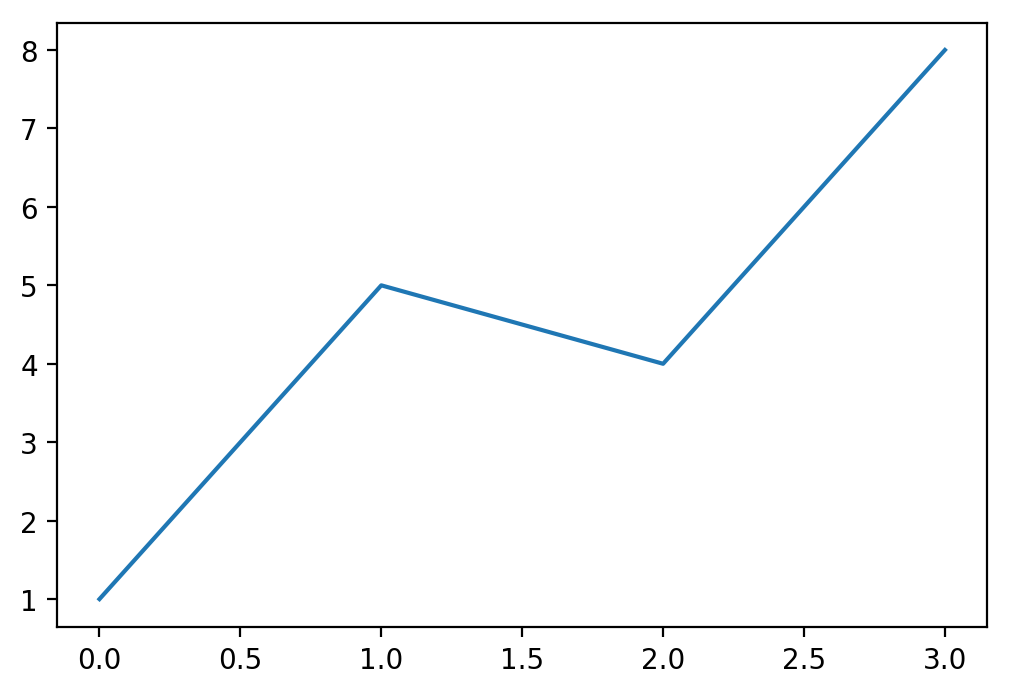

In [41]:
plt.plot([1, 5, 4, 8]);

**ℹ️ Tip**: In other environments, it'd be required to call `plt.show()` in order to display the chart, but thanks to the `%matplotlib inline` magic, that is no longer needed. For cells that display multiple charts, `plt.show()` still has to be called after each chart. Also we are using the `;` trick to supress the output, which is just the memory address of a matplotlib object.

Provide both axes values:

In [42]:
x = 1, 2, 4
y = 5, 4, 7

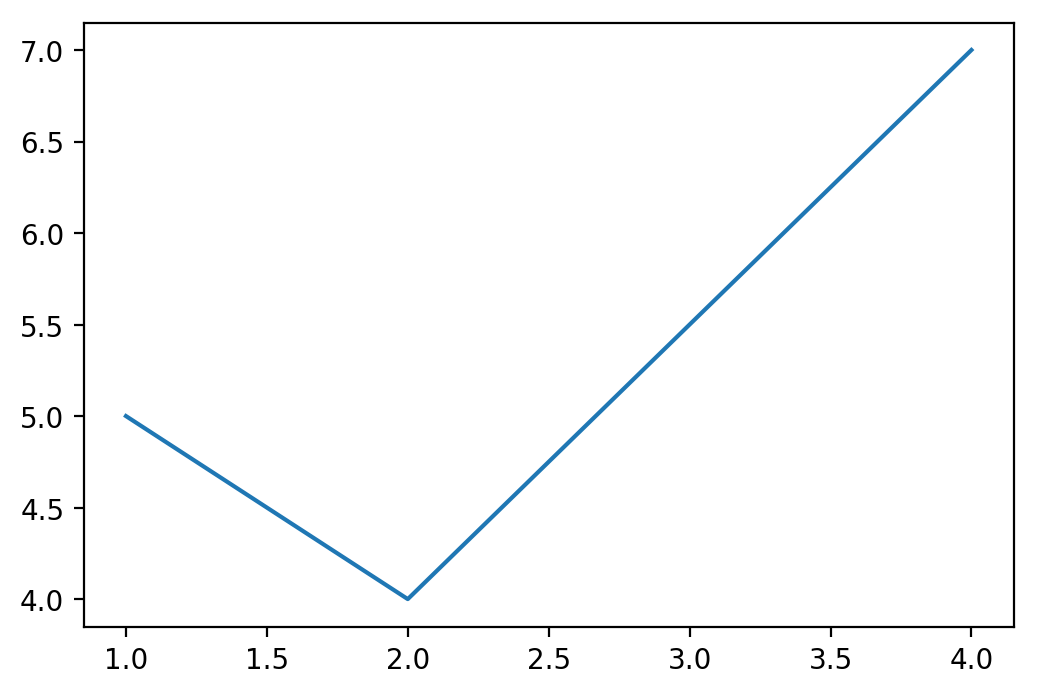

In [43]:
plt.plot(x, y);

### Fundamental Charts

How and when to use the various types of basic charts

#### Line

Line charts display information as a series of data points connected by straight lines.  It is used to visualize a trend in data over a sequential variable, such chronologically. The horizontal axis is a (discretized) continuous variable and the vertical axis represents a measured value.

In [44]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
price = [  70,   72,   79,   80,   85,   77]

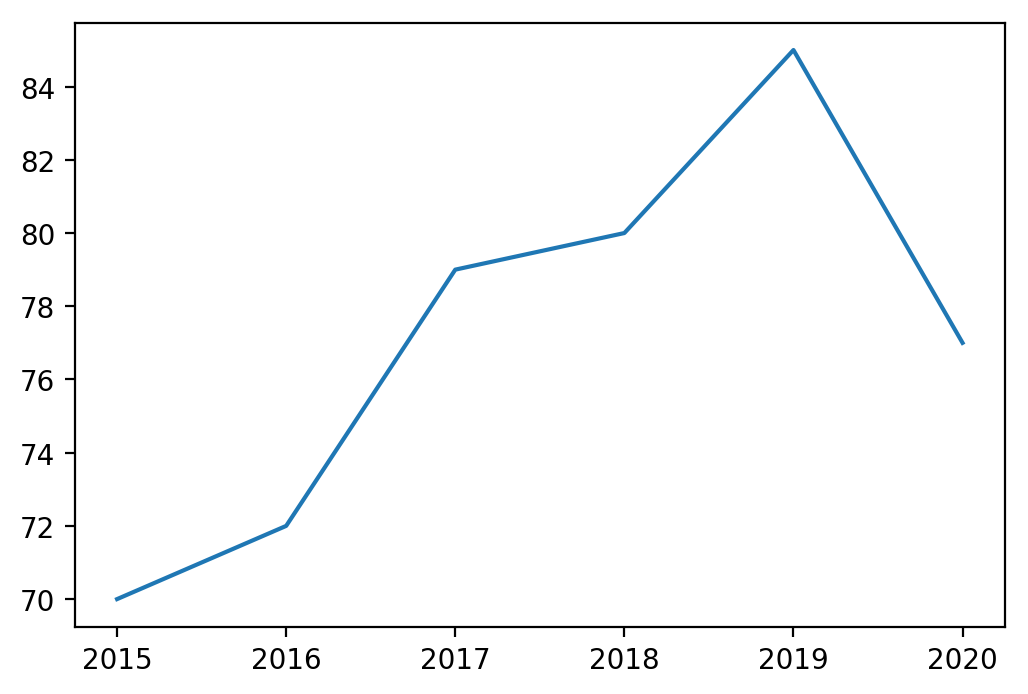

In [45]:
plt.plot(years, price);

#### Bar

Bar charts present categorical data with bars of lengths proportional to the variable they represent. It is used to compare discretely-indexed values. The horizontal axis shows a discrete variable and the vertical axis represents a measured value.

In [46]:
companies = ['Stark Ind.', 'Wayne Ent.', 'Lexcorp', 'Oscorp', 'ACME']
valuation = [41, 37, 31, 26, 24]

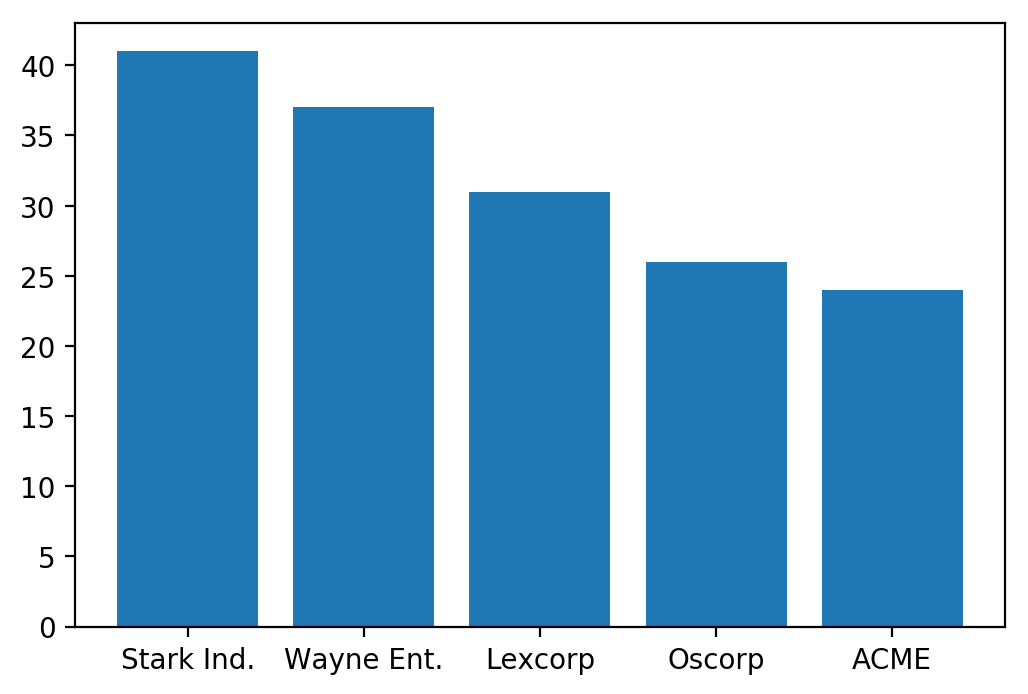

In [47]:
plt.bar(companies, valuation);

**ℹ️ Tip**: unless there is a specific reason not to, order data points

**ℹ️ Tip**: multi-line labels can be achieved by placing `\n` inside the label string. When possible, shorter labels should be preferred.

#### Scatter

A scatter plot displays values for two variables as a collection of points. It is used to identify the relationship between two variables. The position of each point is by one variable on the horizontal axis and the other variable on the vertical axis.

In [48]:
height = [146, 152, 161, 164, 166, 171, 174, 178, 185, 195]
weight = [ 54,  59,  79,  75,  73,  82,  85,  84,  92,  94]

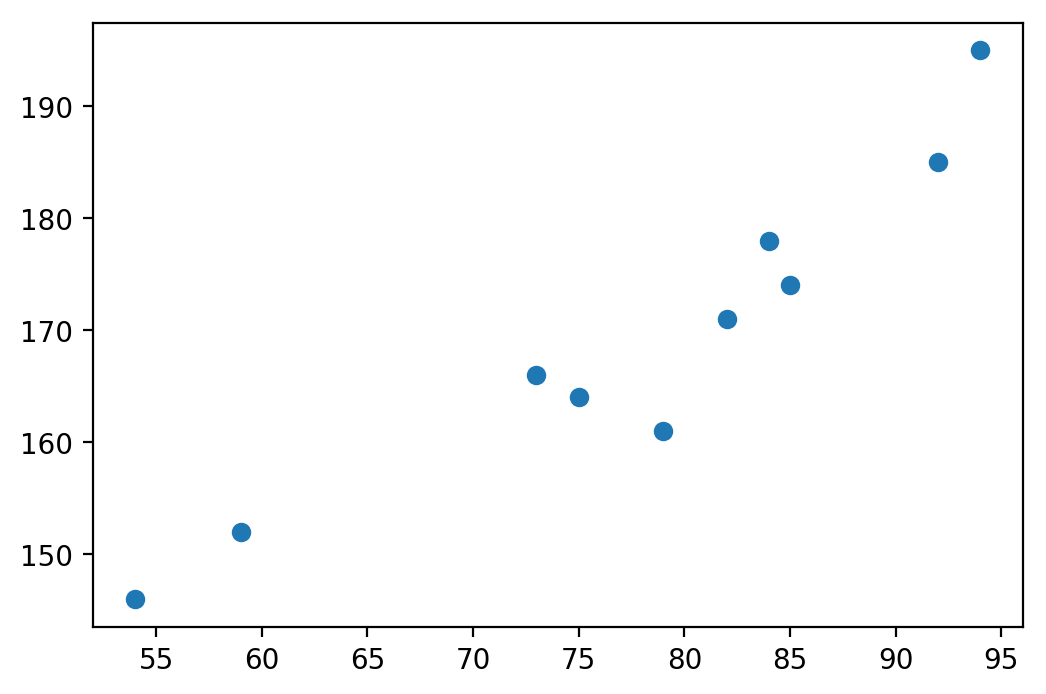

In [49]:
plt.scatter(weight, height);

#### No Pie

Pie charts appear deceitfuly friendly, but in reality, the data can almost always be presented in a better format. The human eye has evolved to be able to compare linear distances. It is difficult to tell the difference between angles, especially when precision is important.

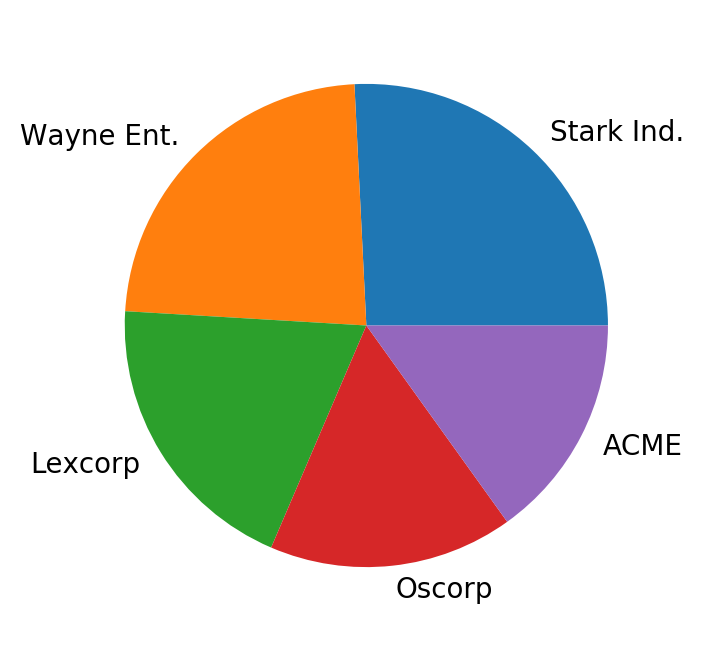

In [50]:
plt.pie(valuation, labels=companies)
plt.gca().set_aspect('equal')

Whichone is larger, _ACME_ or _Lexcorp_? As shown before, the data can be much more efficiently presented in the form of a bar chart. Even for such few data points, angular distances are hard to interpret. The only time pie charts can be efficient is when you have very very few slices:

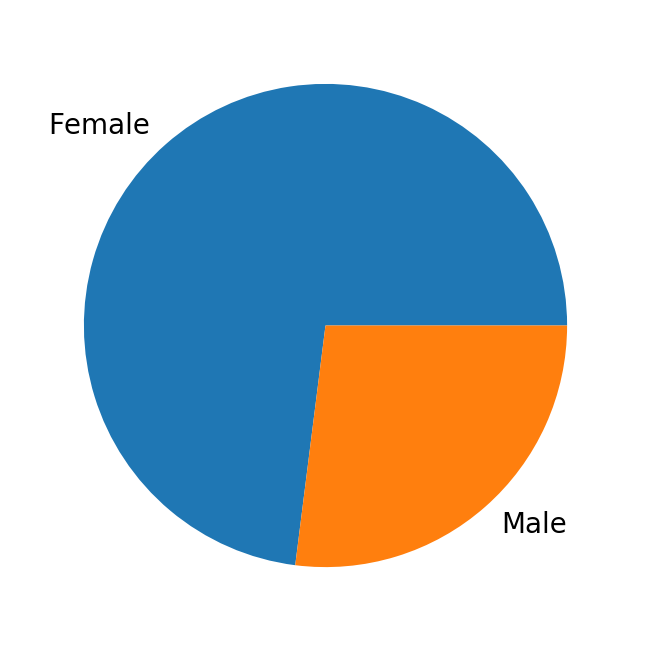

In [51]:
plt.pie([.73, .27], labels=['Female', 'Male'])
plt.gca().set_aspect('equal')

Even in this case, just showing the single number is more effective: _73% Female_. 

**AVOID PIE CHARTS!**

**ℹ️ Tip**: area charts, in general, are less efficient, because it is harder to compare areas than lengths. We usually underestimate the size of bigger shapes and overestimate the size of the smaller ones, because we instinctively judge the lengths or widths and not their areas.

#### Derivative Chart Types

The basic charts can be expanded with options into derivative ones

##### Negative Bar Charts

The regular bar chart can also be used to display negative values. In case positive values are displayed as well, the zeroline makes comparisons easier:

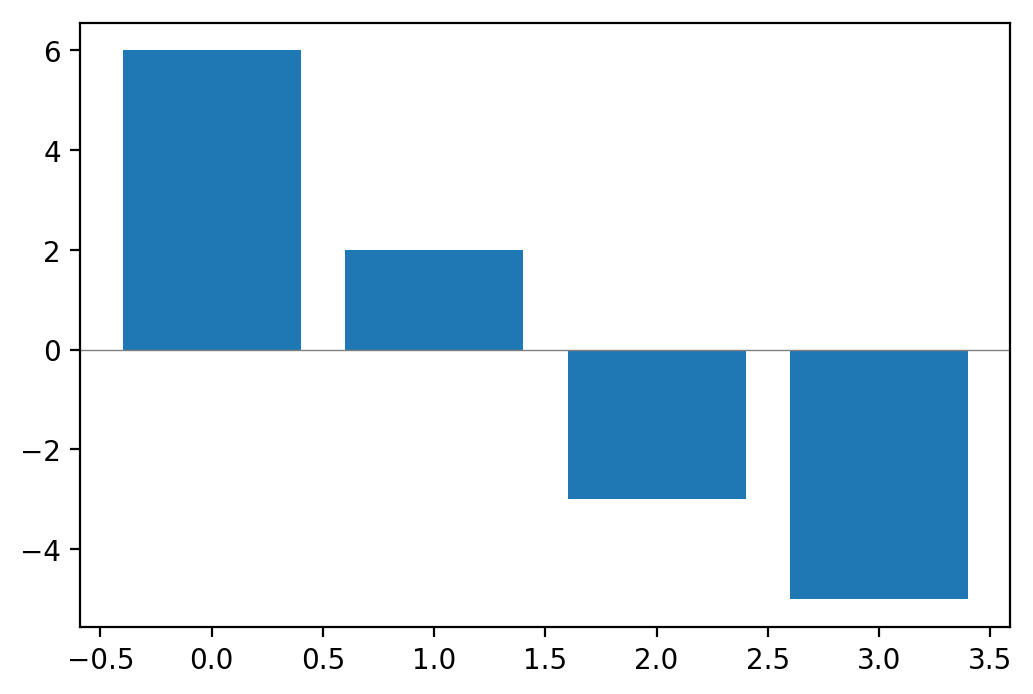

In [40]:
plt.bar(range(4), [6, 2, -3, -5])
plt.axhline(0, color='gray', linewidth=.5);  # draw a horizontal line at y=0

##### Stacked Bar Charts

Show two series for the same index:

In [52]:
companies = ['Stark\nIndustries', 'Wayne\nEnterprises', 'Lexcorp', 'Oscorp', 'ACME']
valuation = [41, 37, 31, 26, 24]
potential = [ 4,  9,  3,  5,  4]

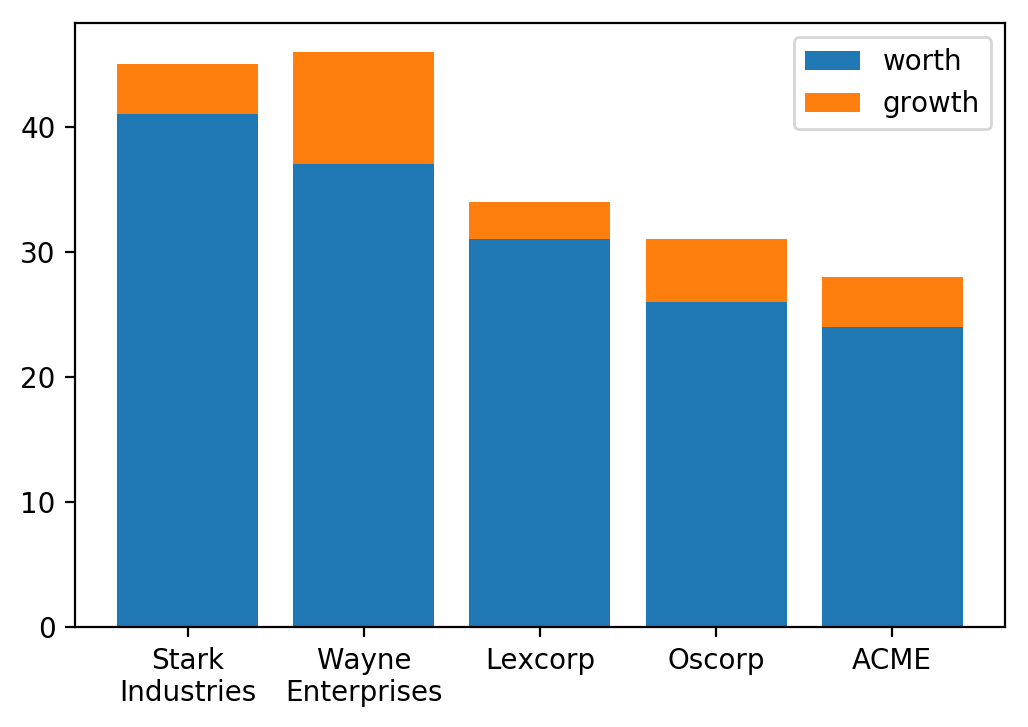

In [53]:
plt.bar(companies, valuation, label='worth')
plt.bar(companies, potential, bottom=valuation, label='growth')

plt.legend();

##### Grouped Bar Charts

Same data, but highlight differences in the second series, not in the overall sum:

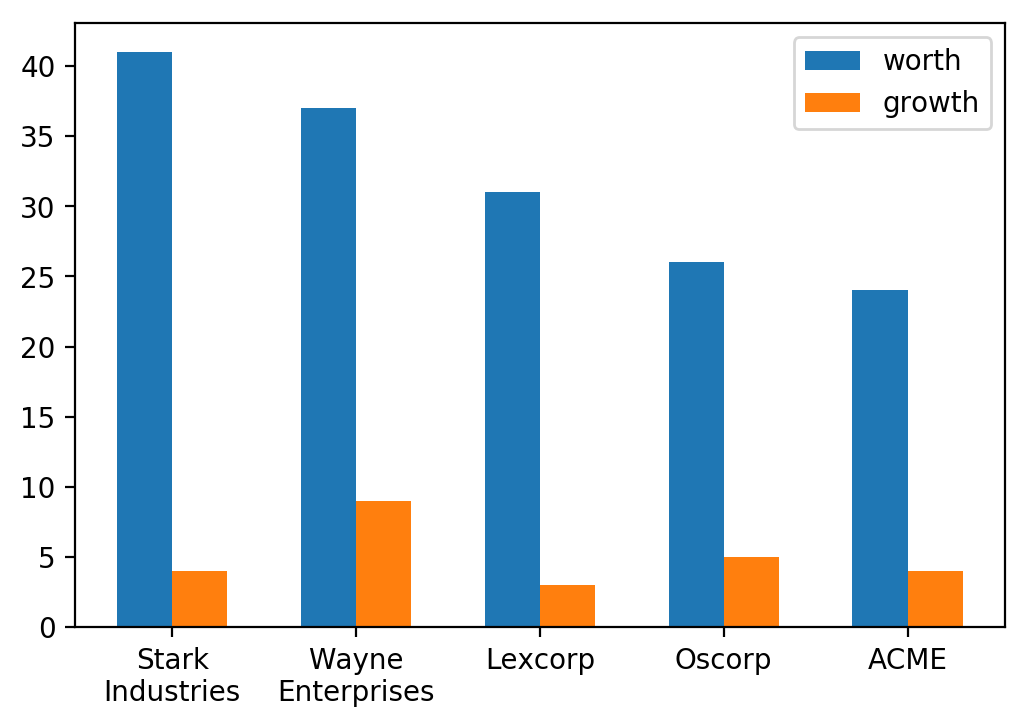

In [54]:
width = .3
x = np.arange(len(companies))

plt.bar(x,         valuation, width=width, label='worth')
plt.bar(x + width, potential, width=width, label='growth')

plt.gca().set_xticks(x + width / 2)
plt.gca().set_xticklabels(companies)
plt.legend();

##### Area Chart

Line chart where the bottom is filled:

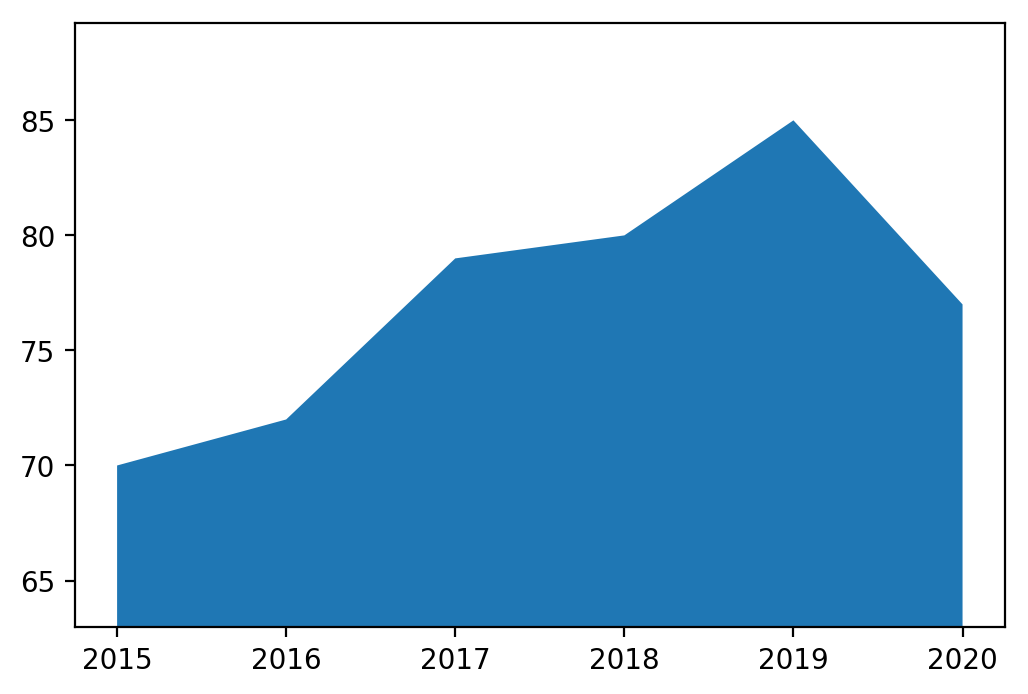

In [52]:
plt.fill_between(years, price)
plt.ylim(min(price) * .9);

##### Stacked Area Chart

Similar to stacked bar charts, but for continously-indexed series:

In [53]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
price = [  70,   72,   79,   80,   85,   77]
tax   = [   2,    4,    3,    9,    1,    2]

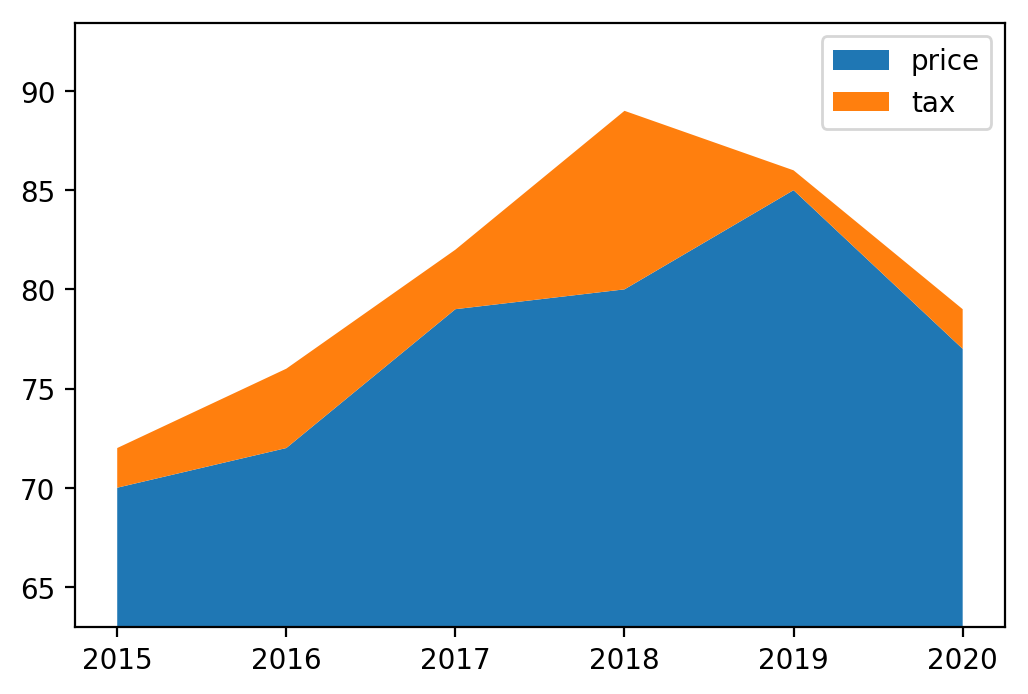

In [54]:
plt.stackplot(years, price, tax, 
              labels=['price', 'tax'])

plt.ylim(min(price) * .9)
plt.legend();

### Options

Matplotlib features a wealth of customization options, which allow you to draw plots just the way you need them. All of the options in the following sub-sections can be combined together.

#### Line Properties

Common line (trace) options:

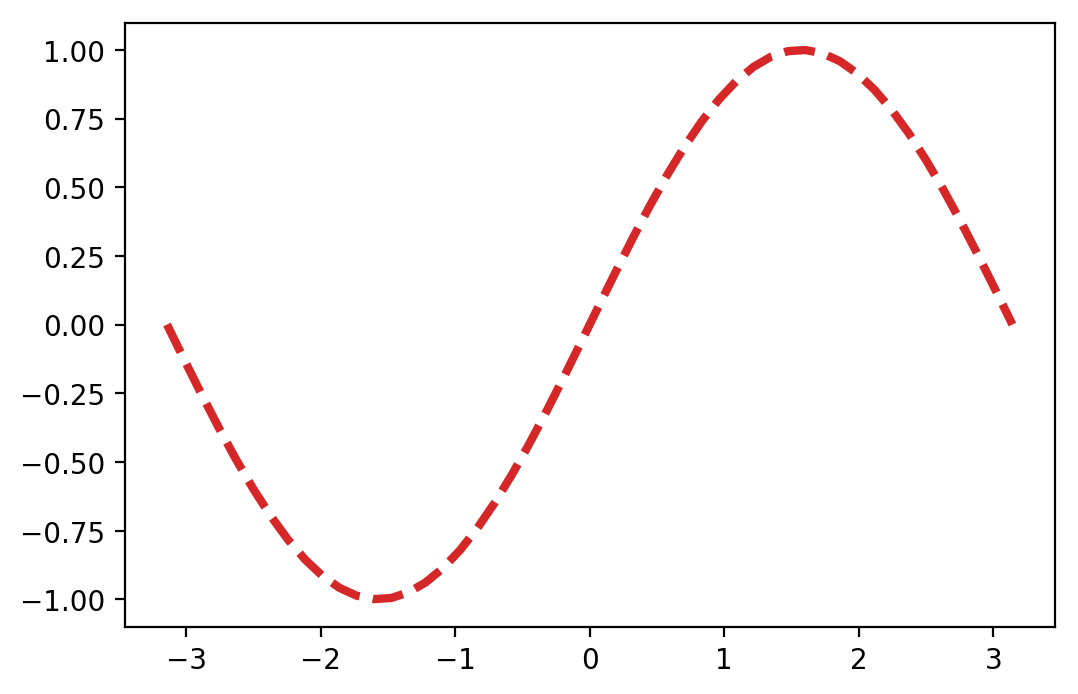

In [54]:
xs = np.linspace(-np.pi, np.pi, num=50)
ys = np.sin(xs)

plt.plot(
    xs,
    ys,

    color='C3',
    linestyle='--',
    linewidth=3,
);

Options can also be quickly given in short-form:

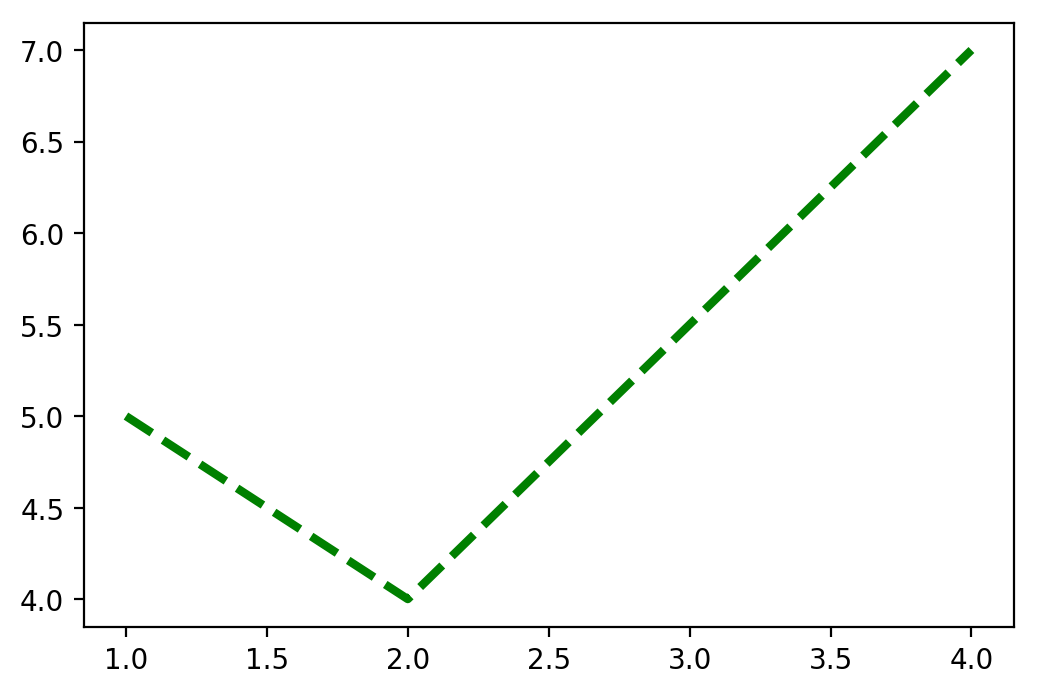

In [56]:
plt.plot(x, y, 'g--', lw=3);  # green, dashed line, width of 3

Default color palette:


![pic](https://i.imgur.com/aGT8APH.png)

**👾 Trivia**: the default color palette is designed to both readable, pleasing and have distinctive colors. It was originally developed at [Tableau](https://www.tableau.com), a powerful standalone data visualization suite. You can find out more about the choice of default style in Matplotlib [here](https://www.youtube.com/watch?v=xAoljeRJ3lU).

#### Marker Properties

Common marker (points) options. Every property can be constant, the same for all points (like `alpha`, `marker` or `edgecolor` below) or per-point (like `s` or `color` below):

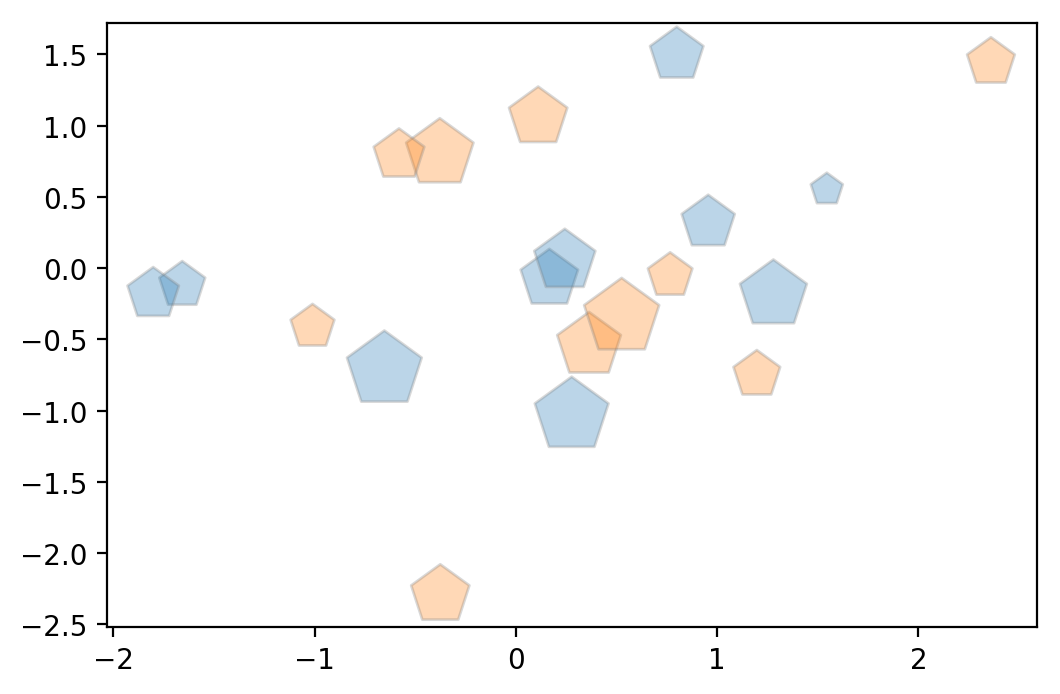

In [20]:
n_points = 20
plt.scatter(
    x=np.random.randn(n_points), 
    y=np.random.randn(n_points), 
    
    s=np.random.uniform(100, 1_000, n_points), # size
    color=np.random.choice(['C0', 'C1'], n_points),
    
    alpha=.3,  # transparency
    marker='p',  # pentagon
    edgecolor='gray',
);

**👾 Trivia**: both the American and British spellings of `gray`/`grey`. XKCD (the web-comic maker) ran a survey to see what labels do people assign to various colors. Read about the [results](https://blog.xkcd.com/2010/05/03/color-survey-results/) or explore them in this [interactive visualization](https://colors.luminoso.com).

---

Markers can also be displayed for line plots (all previous options apply as well):

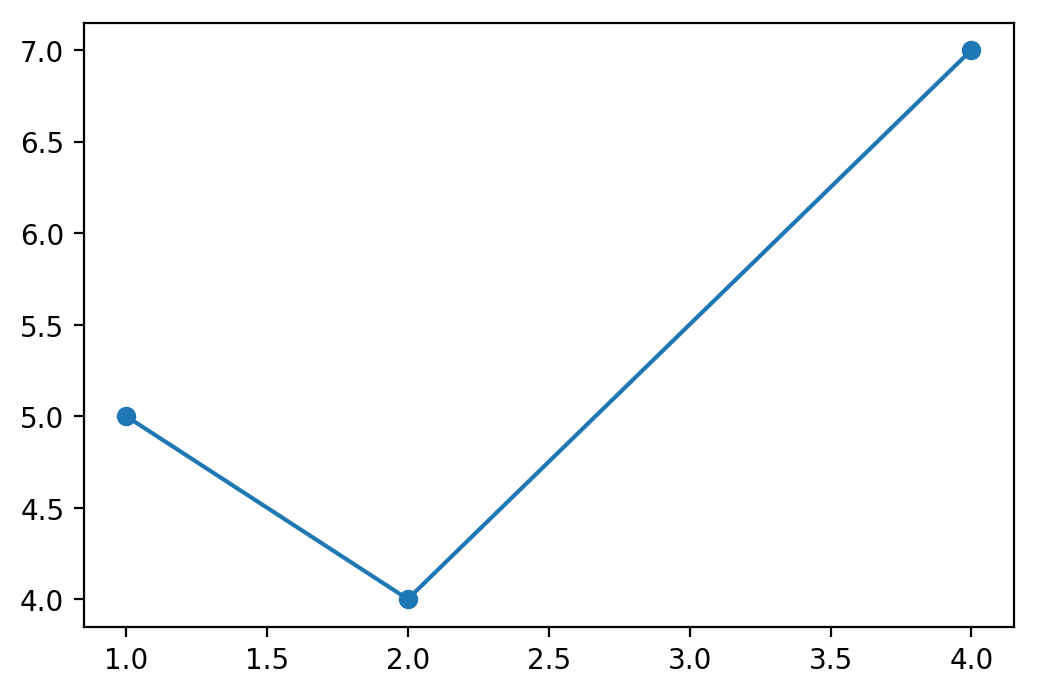

In [57]:
plt.plot(x, y, marker='o'); # circular markers

**ℹ️ Tip**: all available marker shapes are listed [here](https://matplotlib.org/api/markers_api.html)

#### Figure Properties

Nearly every element of the chart can be customized.

The vanilla chart:

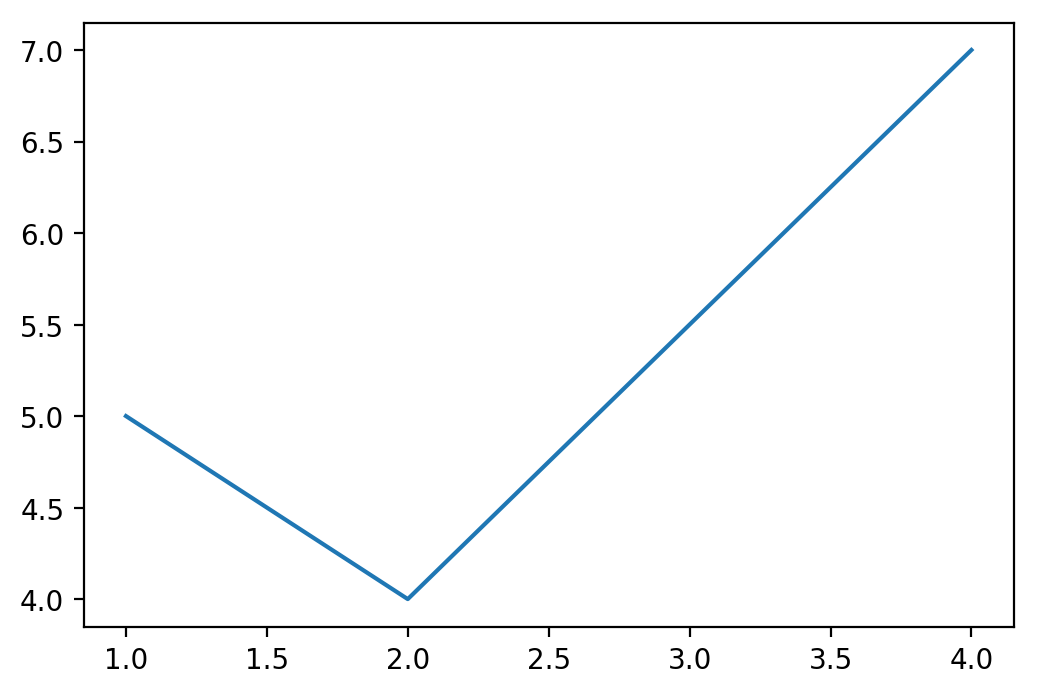

In [58]:
plt.plot(x, y);

Customized and labeled:

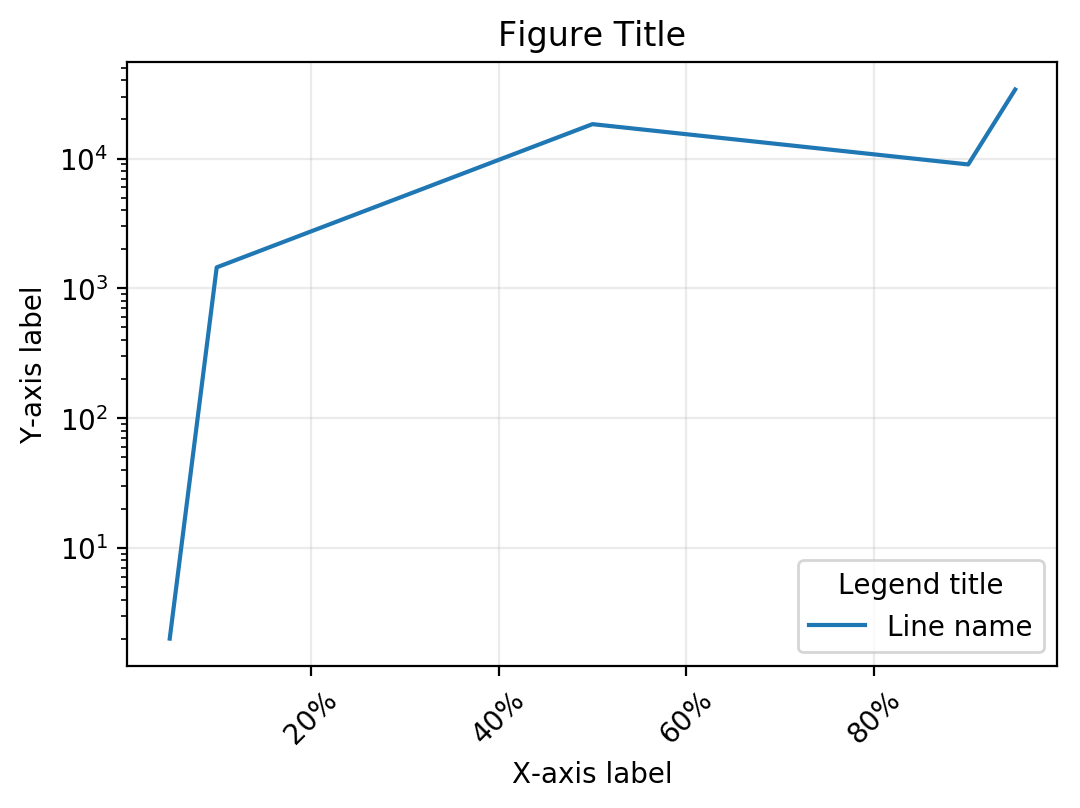

In [30]:
plt.plot(x, y, label='Line name')

plt.title('Figure Title')
plt.legend(title='Legend title', loc='lower right')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

plt.grid(alpha=.25)
plt.gca().set_yscale('log')

plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()], rotation=45);

**ℹ️ Tip**: refer to the [Parts of a Figure](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure) for more detailed descriptions about each part of the figure:

![pic](https://matplotlib.org/_images/anatomy.png)

**ℹ️ Tip**: aim for a high [ink-to-data ratio](https://infovis-wiki.net/wiki/Data-Ink_Ratio), avoid over-encumbering the chart with too many elements.

**ℹ️ Tip**: don't let the audience guess what the data represents. Annotate charts with a title and axis labels at the least. If a person randomly opens the book and lands on your chart, they should be able to understand what's going on. If possible, add a short description and an accompanying conclusion.

**ALWAYS PROVIDE LABELS!**

---

**ℹ️ Tip**: remove just tick markers and labels (not axis labels or grids) with `plt.xticks([])`.

#### Axes Limits

Change axes limits with `plt.xlim`/`plt.ylim`

In [47]:
from matplotlib.ticker import FuncFormatter

def plot_companies_worth():
    plt.bar(companies, valuation)
    plt.ylabel('Worth (billions)')
    
    formatter = FuncFormatter(lambda y, pos: f'${y:.0f}')
    plt.gca().locator_params(axis='y', nbins=5)  # number of ticks
    plt.gca().yaxis.set_major_formatter(formatter)  # tick label format

**ℹ️ Tip**: you can also provide a formatter for the tick labels, and specify the number of ticks (shown in the example above), or specify the spacing between ticks (`ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(tick_spacing)`).

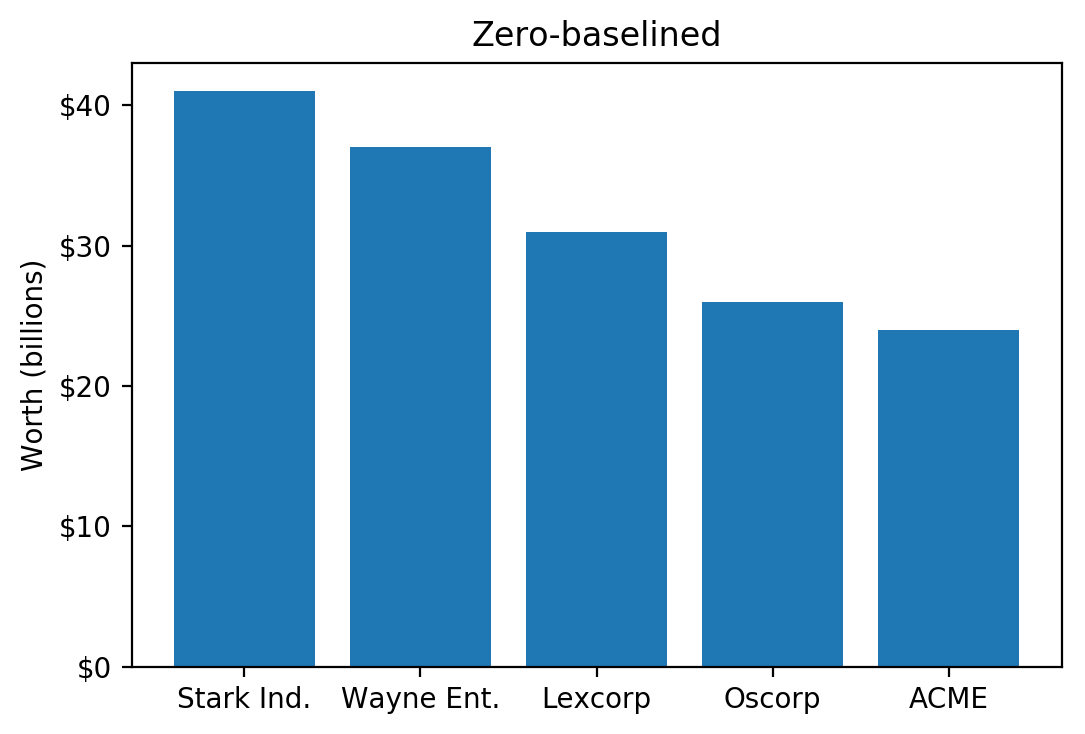

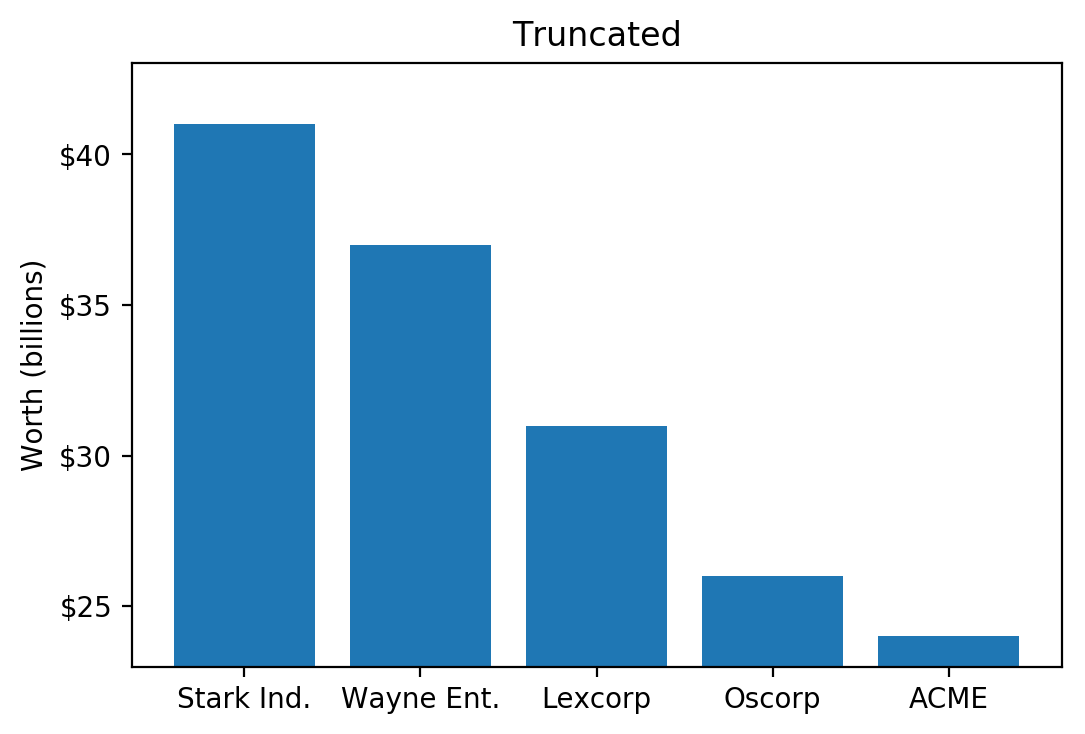

In [48]:
plot_companies_worth()
plt.title('Zero-baselined')
plt.show()

plot_companies_worth()
plt.title('Truncated')
plt.ylim(23);

**ℹ️ Tip**: Bar charts ask viewers compare the relative lengths. Showing just the tips of the bars to exaggerate differences in the data, their relative lengths changes. So people are either misled and take away the wrong message, or end up having to read the numbers, which defeats the purpose of the chart. There are exceptions.

The issue is even more pronounced when non-abstract figures are presented. For example, the average Dutch person is not three times as tall as the average Filipino:

![img](https://i.redd.it/tvxqbdux6uqz.jpg)

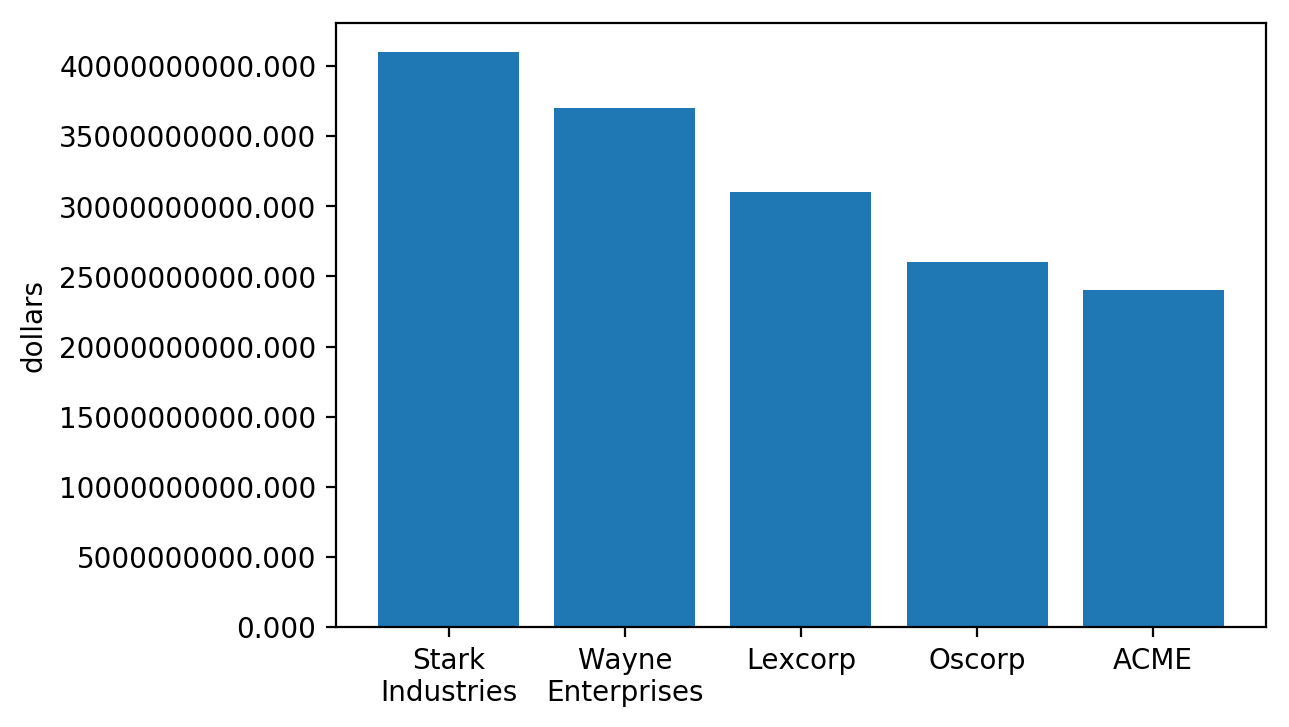

In [73]:
noisy_valuation = np.array(valuation) * 1_000_000_000
plt.bar(companies, noisy_valuation)

plt.gca().set_yticklabels([f'{x:.3f}' for x in plt.gca().get_yticks()])
plt.ylabel('dollars');

**ℹ️ Tip**: provide effective labels:
- do not mistake the measurement with the units — in the above example, we are showing the _worth_, not the _dollars_ for each company.
- declutter the tick marks, while provide the same information — in the above example, since all valuations are provided in billions, it is easier to specify it in the axis label
- show appropriate units on the tick labels (e.g.: `$`, `★`, etc)
- show percentage values as percentages (e.g.: show `50%` instead of the way it is stored, `0.5`)
- show an appropriate amount of decimals — more decimal digits might indicate more precision, but they reduce readability without adding actual value
- sometimes it is useful to provide the value labels at the top of each bar
- capitalize axes labels like you would table headers (capitalize first word)

#### Aspect Ratio

Change the figure size (and aspect ratio):

In [46]:
def plot_price_evolution():
    plt.plot(years, price)
    plt.gca().set_yticklabels([f'${y:.0f}' for y in plt.gca().get_yticks()])
    plt.ylabel('Price')

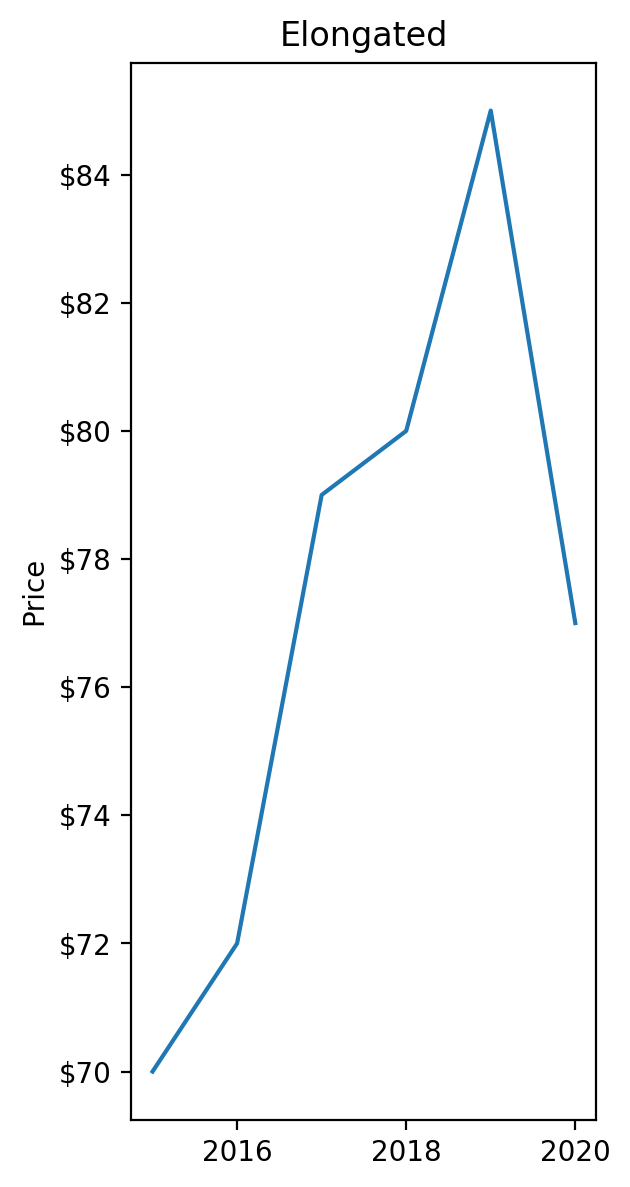

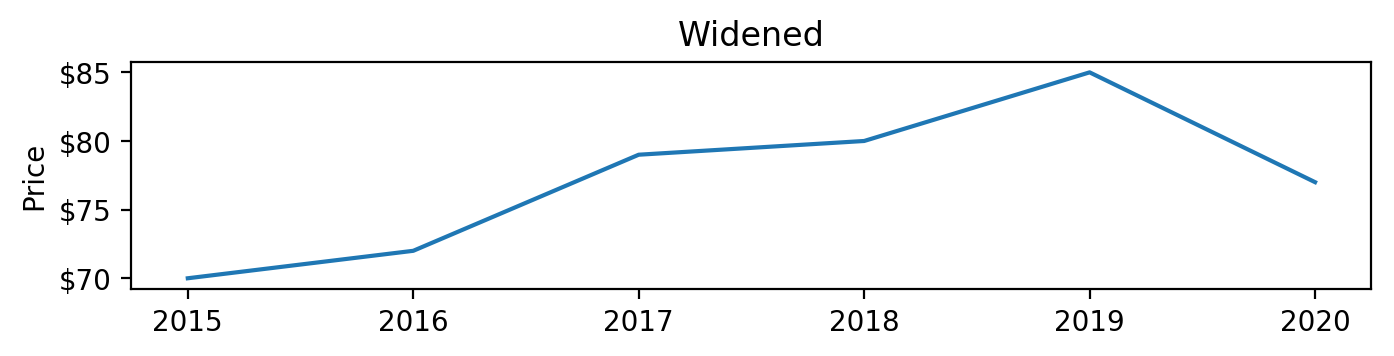

In [46]:
plt.figure(figsize=(3, 7))  # in "inches"
plot_price_evolution()
plt.title('Elongated')

plt.figure(figsize=(8, 1.5))
plot_price_evolution()
plt.title('Widened');

**ℹ️ Tip**: Line charts show a trend. Stretching the height of the graph can overblow the message, while stretching the width can understate it. This leads to misleading the audience.

### Multiple Plots

Chart multiple sets of data at once, either in the same figure, different ones, or composite figures.

#### Same figure

Plot multiple lines/points in a single figure by placing multiple statements in the same cell (or between `plt.show()` calls):

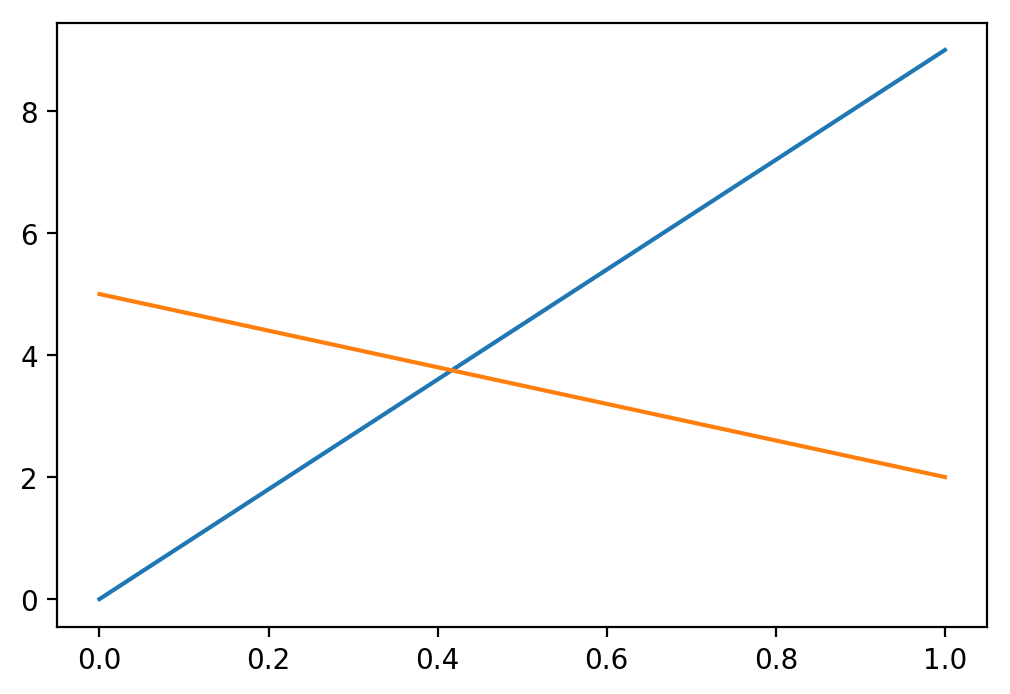

In [58]:
plt.plot([0, 9])
# plt.scatter([1, 4, 2, 3], [2, 1, 4, 5])
plt.plot([5, 2]);

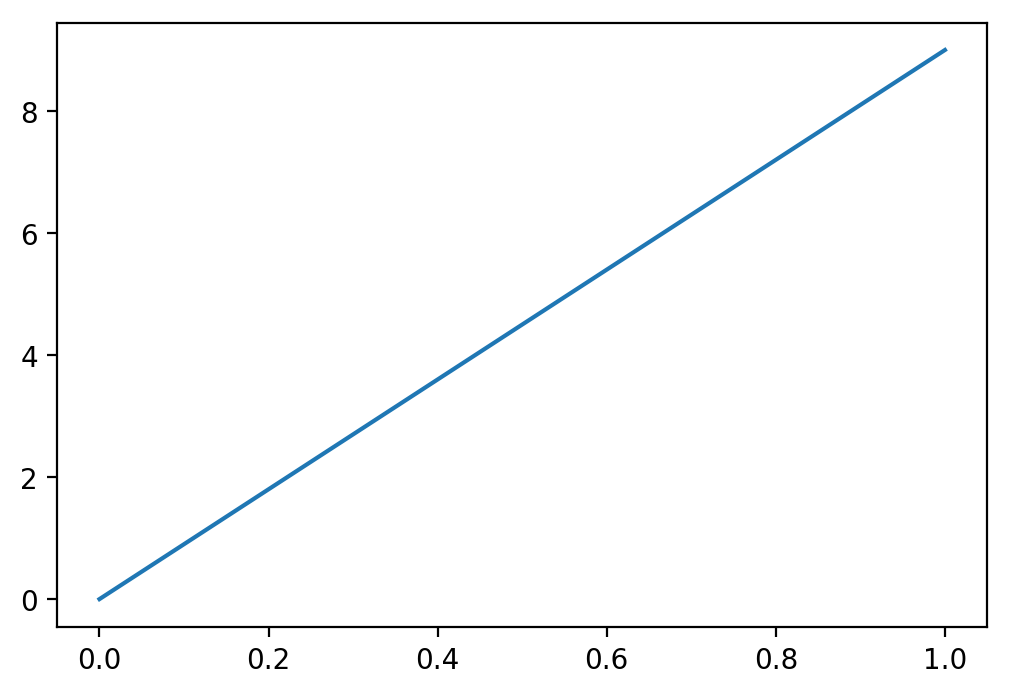

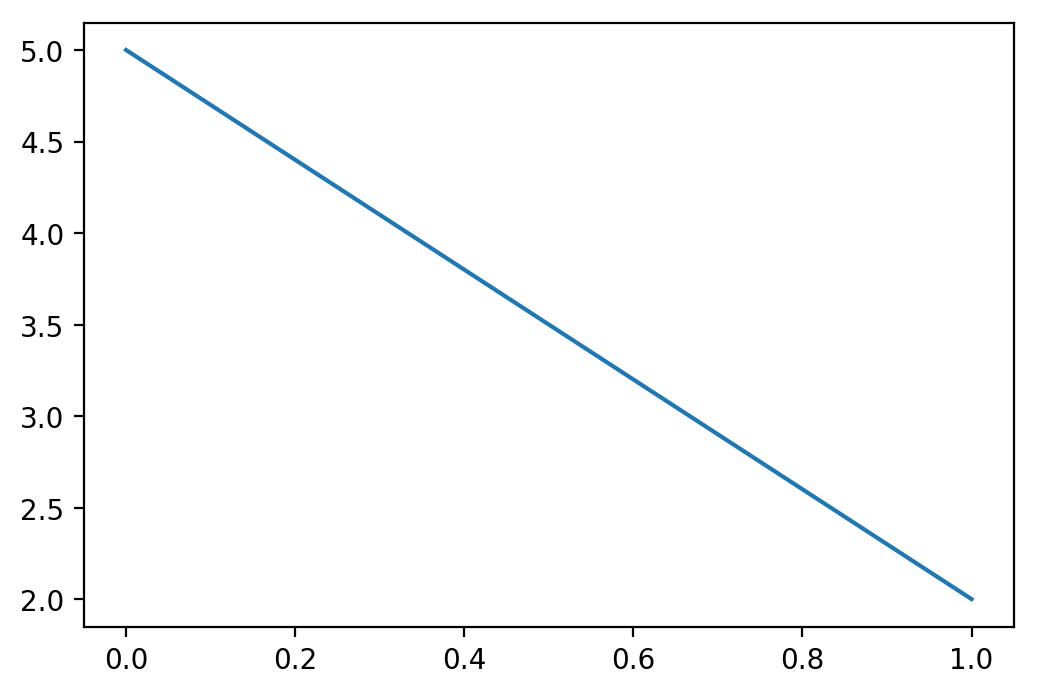

In [60]:
plt.plot([0, 9])
plt.show()
plt.plot([5, 2]);

#### Multiple Figures

Preserve the same Y-axis limits:

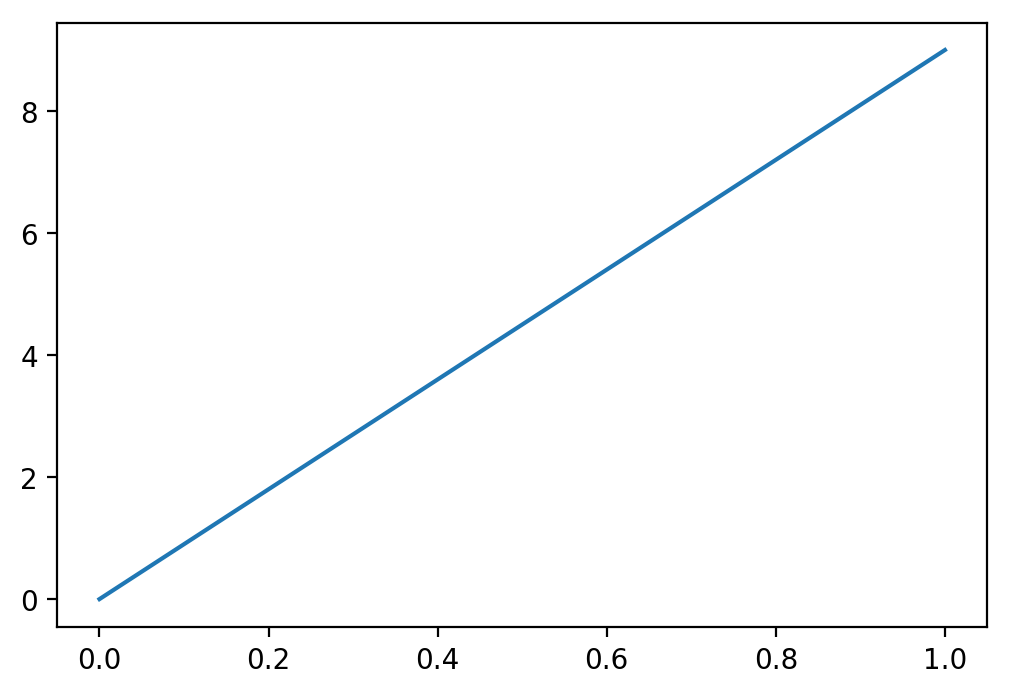

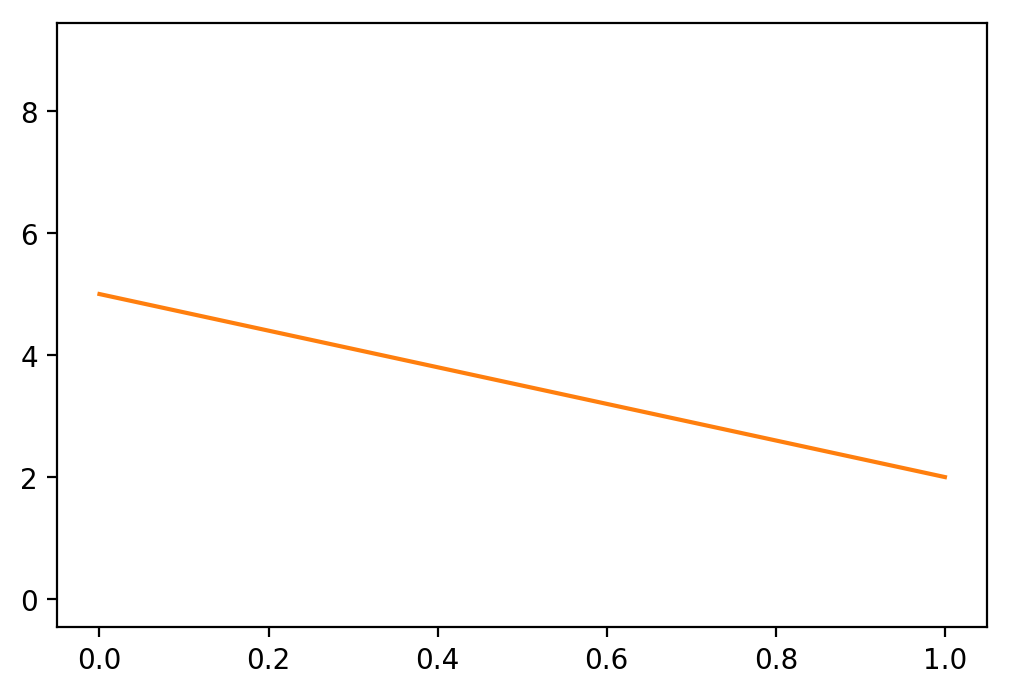

In [59]:
plt.plot([0, 9])
y_limits = plt.ylim()
plt.show()

plt.ylim(y_limits)
plt.plot([5, 2], c='C1');

#### Subplots

A figure is composed of one or more axes. When only one is present, `plt.` refers to it, otherwise it refers to the current figure & axis. You can get the figure & axis handles either by instantiating a new figure with `fig = plt.figure()`, creating subplots (see below) or directly from traces, `ax = plt.plot(...)`.

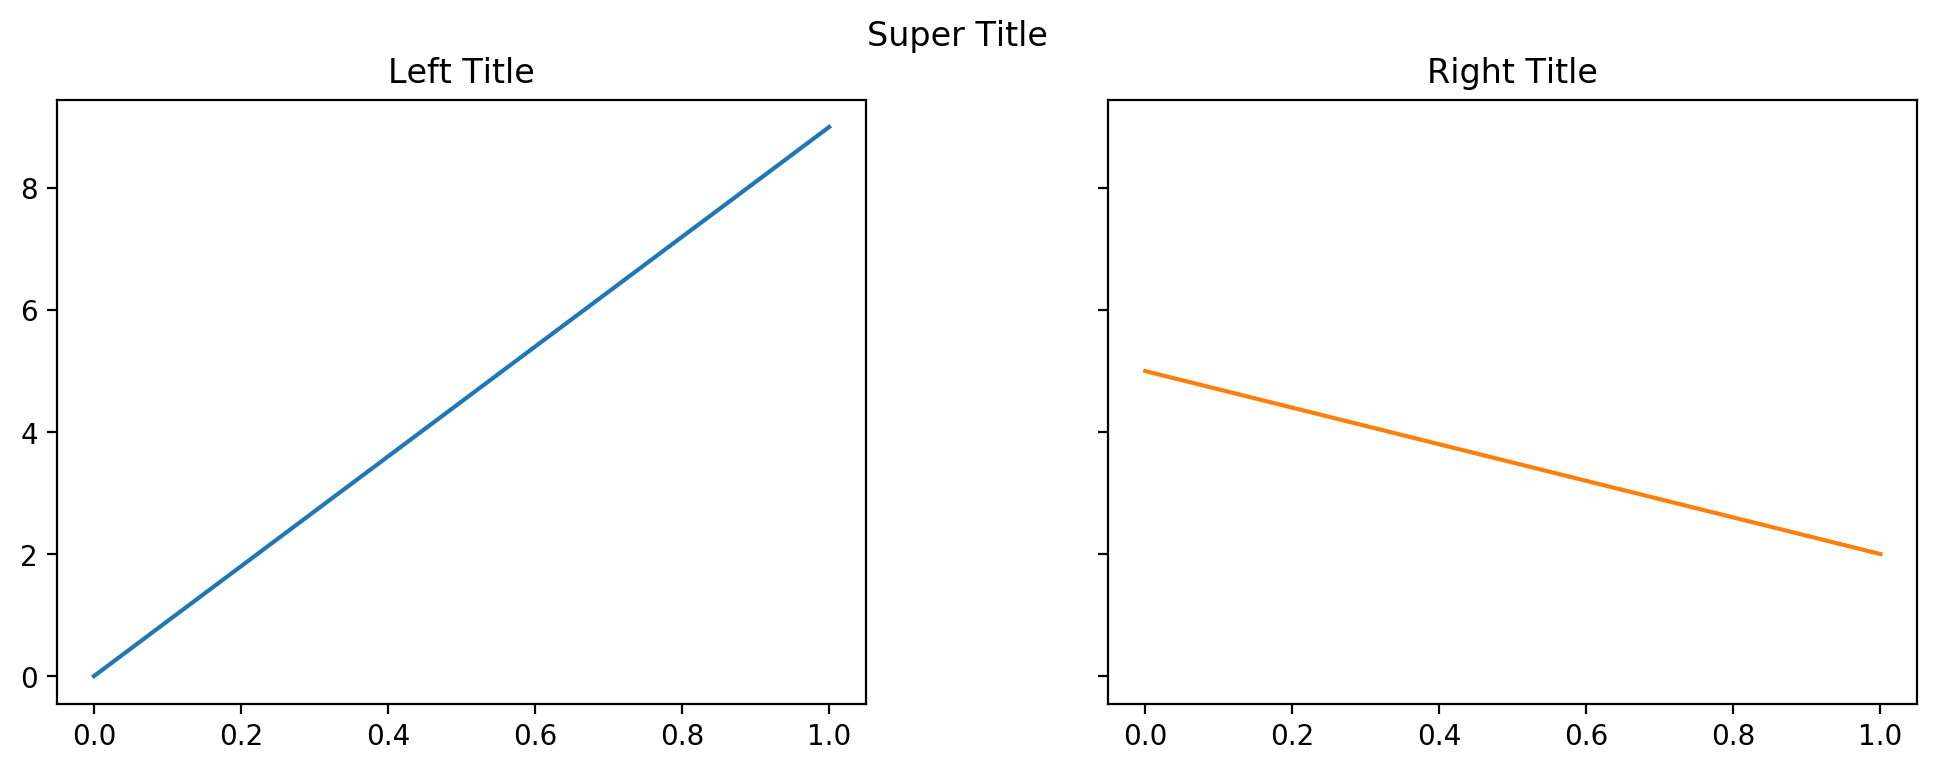

In [65]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
                               sharey=True, # size of the entire figure, not of individual plots
                               figsize=(12, 4))

ax1.plot([0, 9])  # note that we plot using `ax.plot` not `plt.plot`
ax2.plot([5, 2], c='C1')

plt.subplots_adjust(wspace=.3)

ax1.set_title('Left Title')  # note the slightly changed syntax `ax.set_title(...)` instead of `plt.title(...)`
ax2.set_title('Right Title')
plt.suptitle('Super Title');

**ℹ️ Tip**: get the current axis with `plt.gca()` and the current figure with `plt.gcf()`.

Alternatively, in short-form:

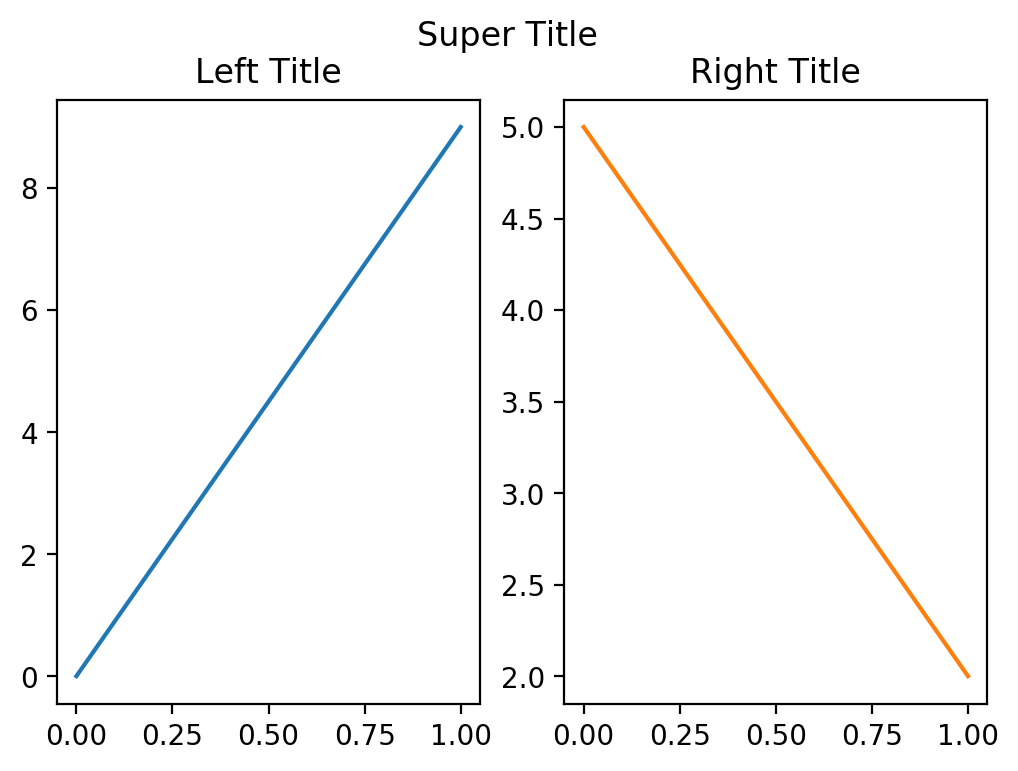

In [62]:
plt.subplot(1, 2, 1)  # now it's `subplot`, not `subplots`
plt.plot([0, 9])  # now it's `plt.plot`
plt.title('Left Title')

plt.subplot(122)  # can be compacted into a single number (when coordinates are below 10)
plt.plot([5, 2], c='C1');
plt.title('Right Title')

plt.suptitle('Super Title');

The following diagrams helps visualize how `subplot` operates:

- Single row:

![2](http://scipy-lectures.org/_images/sphx_glr_plot_subplot-vertical_001.png)


- Single column: 

![1](http://scipy-lectures.org/_images/sphx_glr_plot_subplot-horizontal_001.png) 


- Multiple rows and columns:

![3](http://scipy-lectures.org/_images/sphx_glr_plot_subplot-grid_001.png)

**ℹ️ Tip**: read more about [working with multiple figures and axes](https://matplotlib.org/tutorials/introductory/pyplot.html#working-with-multiple-figures-and-axes).

#### Twin Axes

Plot two sets of data on completely different scales:

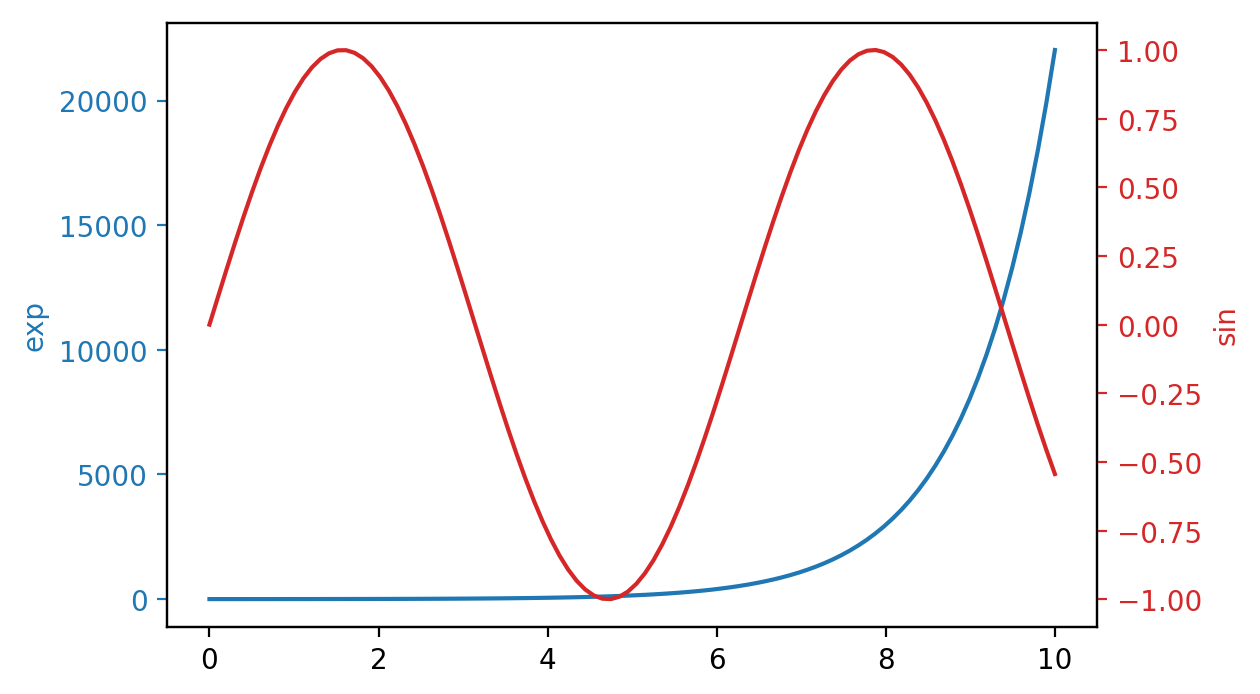

In [66]:
x = np.linspace(0, 10, 100)
y1 = np.exp(x)
y2 = np.sin(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, y1, 'C0')
ax1.set_ylabel('exp', color='C0')
ax1.tick_params('y', colors='C0')

ax2.plot(x, y2, 'C3')
ax2.set_ylabel('sin', color='C3')
ax2.tick_params('y', colors='C3')

**ℹ️ Tip**: charting with two different scales can be confusing and suggest a relationship that may not exist. The viewer compares the magnitude of values between the two sets of data, which is meaningless given that the scales (and potentially units) are different.

**👾 Trivia**: check out more (oftentimes humorous) [spurious correlations](http://www.tylervigen.com/spurious-correlations) such as this one:

![a](http://www.tylervigen.com/chart-pngs/2.png)

### The Effectiveness of Simplicity

Simplicity is the most effective way to convey your message. Remove anything that doesn't support the message and design for comprehension. 


Matplotlib provides sensible defaults, but exessive coloring and other customizations can still degrade a chart. While it is true that an attractive visualization causes better audience engagement and increases openness to the message conveyed, it should never be preferred over readability.

In particular, depth effects and meaningless colors only make the information harder to read, for example this chart:

TODO reorganize into

- simple (want the message to come through, not to sacrifice readability)
 - no 3D or shading
 - no unneeded colors
 - no unnecessary precision
 - remove all axis values and add arrow instead (also mention `sns.despine()`)
 - grids are usually not needed

- sufficient (example with opening a book)
 - axes labels and units (percentages, millions)
 - title, description and conclusion
 
- appropriate/intuitive (otherwise, they are reduced to reading the labels, which defeats the purpose of the chart)
 - truncating
 - aspect ratio
 - y grows from bottom to top and x grows from left to right (show example of guns showing)
 - order bars from smallest to greatest
 
- put it all together (examples of transformations)

![pic](https://i.imgur.com/vjGI5yO.jpg)

todo redo this list

Can be much improved:
 - flatten
 - drop meaningless colors
 - order X-axis chronologically
 - do not duplicate X-axis values, make groups (day/night)
 - provide Y-axis meaning and units

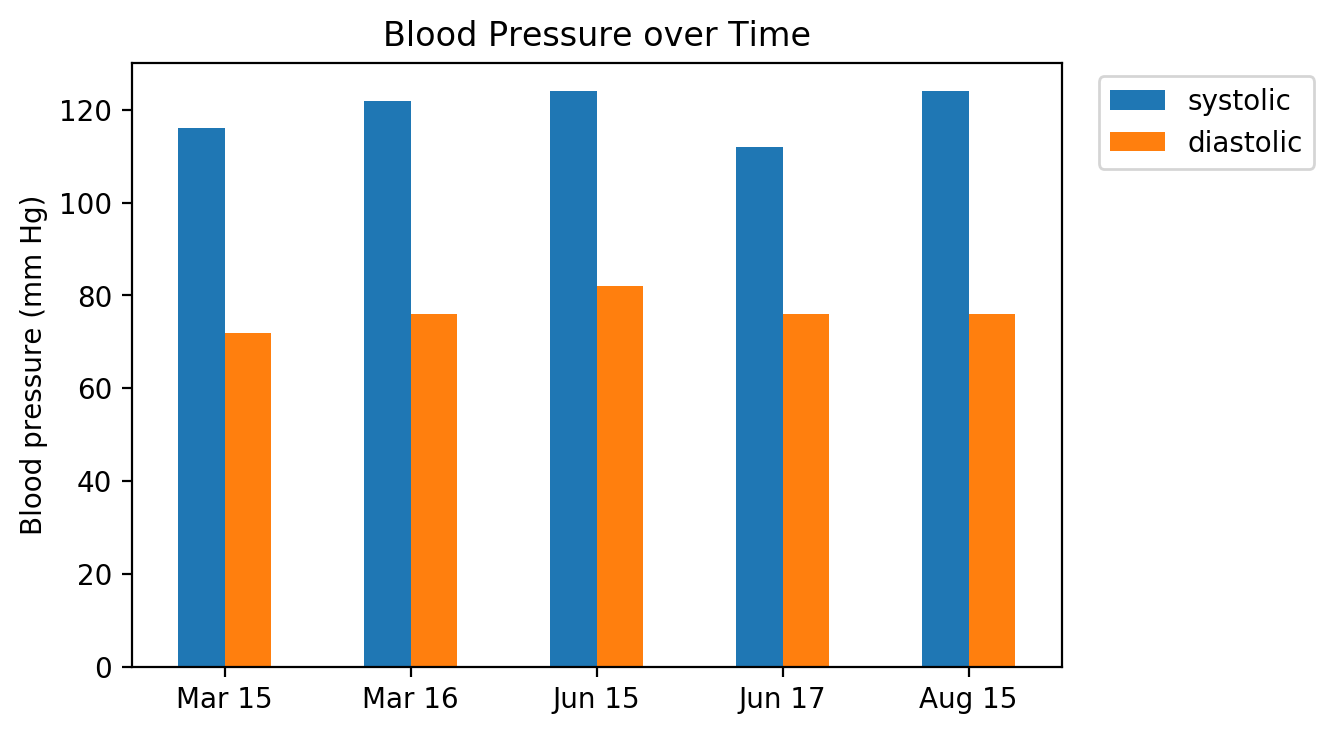

In [63]:
df = pd.DataFrame({
    'systolic':  [116, 122, 124, 112, 124],
    'diastolic': [ 72,  76,  82,  76,  76],
}, index=['Mar 15', 'Mar 16', 'Jun 15', 'Jun 17', 'Aug 15'])

df.plot(kind='bar', rot=0)
plt.title('Blood Pressure over Time')
plt.ylabel('Blood pressure (mm Hg)')
plt.gca().legend(bbox_to_anchor=(1.025, 1));

can go even further: twin axes, with scale of going for the normal range

**ℹ️ Tip**: by default, the legend is placed in the location with the most available whitespace. Manually place it it (even outside of the figure) by specifying the top-left coordinate of the legend box (in terms of figure width and height, with `(0, 0)` being bottom left).

**👾 Trivia**: if you'd like to try spotting some of these errors yourself, check out [this gallery](https://old.reddit.com/r/dataisugly/top/?t=all) of bad visualizations.

---

Save a figure to disk `plt.savefig(path, dpi, format)`, or drag-n-drop it directly from the Jupyter interface.

## Seaborn

Seaborn is a library for statistical data visualization, built on top of Matplotlib. It provides a higher-level interface for more complex visualizations, and a slightly changed style.

In [98]:
import seaborn as sns
sns.set()  # apply Seaborn's style to future charts

### Relationship Plots

To make examples more meaningful, throughout this section, we'll plot actual datasets. One such dataset is the `tips` one, which logs the bills and tips in a restaurant:

In [99]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

#### Scatter

Similar to Matplotlib's counterpart, but with a slightly changed style:

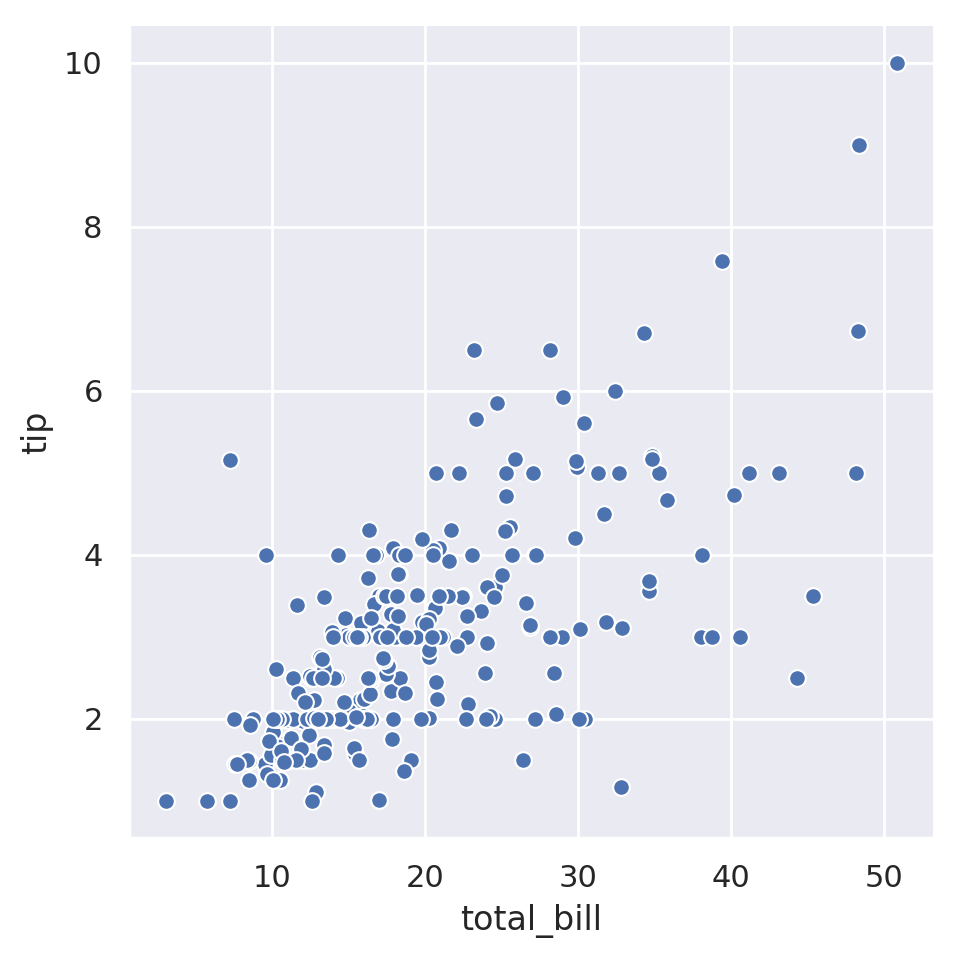

In [100]:
sns.relplot(data=tips, x='total_bill', y='tip');

Quickly add additional information such as the time of the meal (color), the customer's gender (shape) and the party size (size of marker), from the underlying dataset:

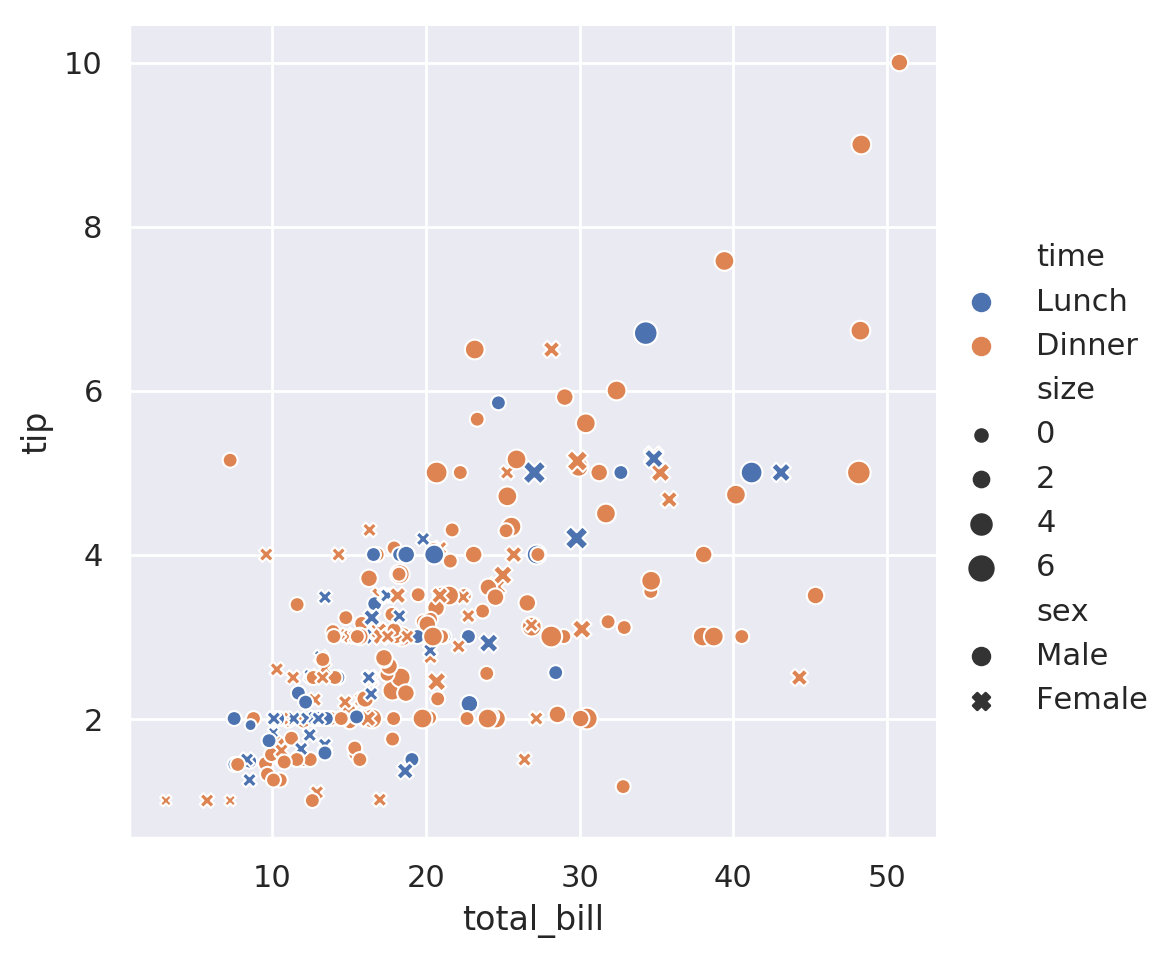

In [101]:
sns.relplot(
    data=tips,
    x='total_bill', 
    y='tip', 
    hue='time',
    style='sex',
    size='size',
);

#### Line

Another example dataset, of continuous measurements (over time):

In [102]:
fmri = sns.load_dataset('fmri')
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

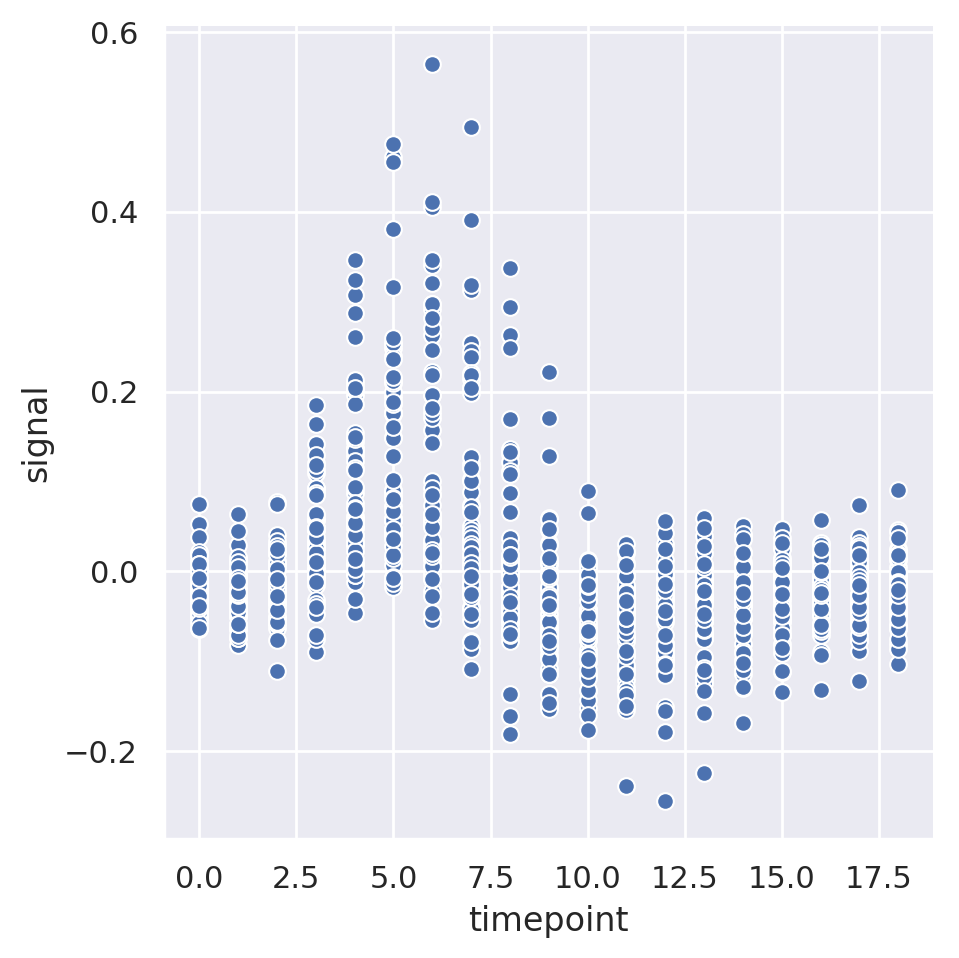

In [108]:
sns.relplot(data=fmri, x='timepoint', y='signal');

Aggregating it into a line, with mean and confidence interval (95%) is more informative:

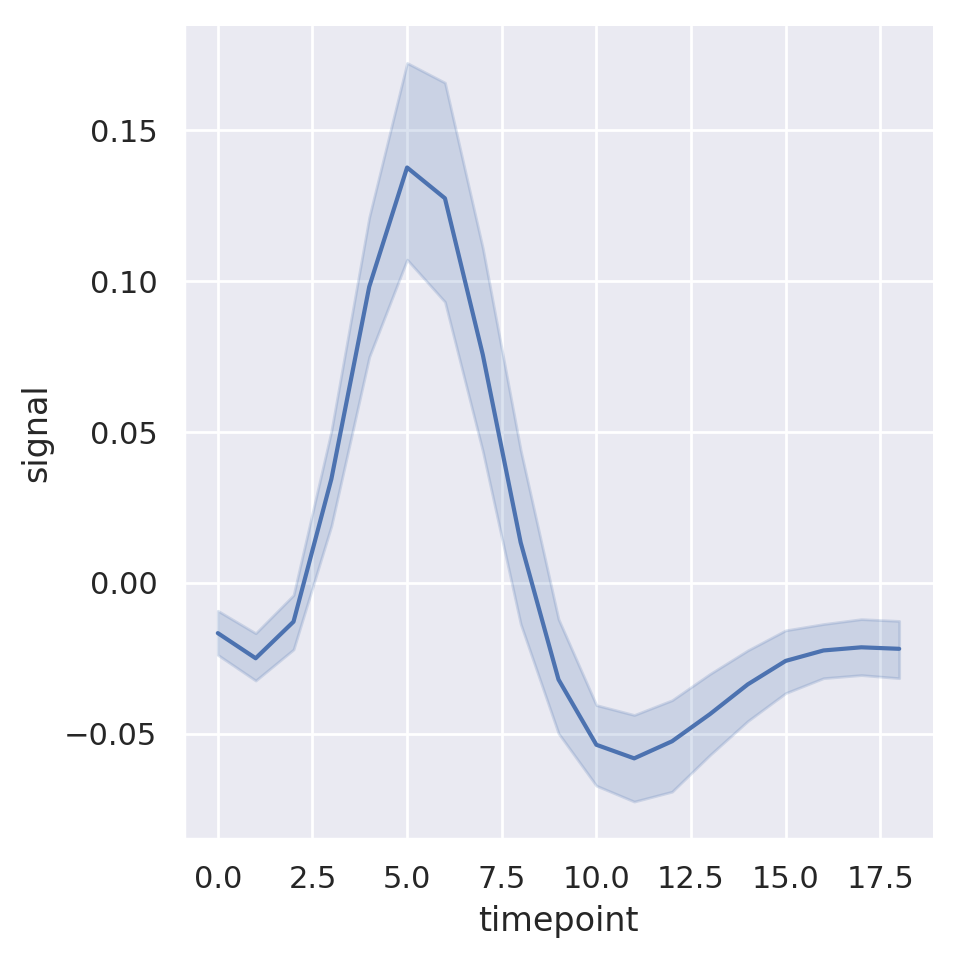

In [109]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line');

Show additional information: the region (color) and event (line style):

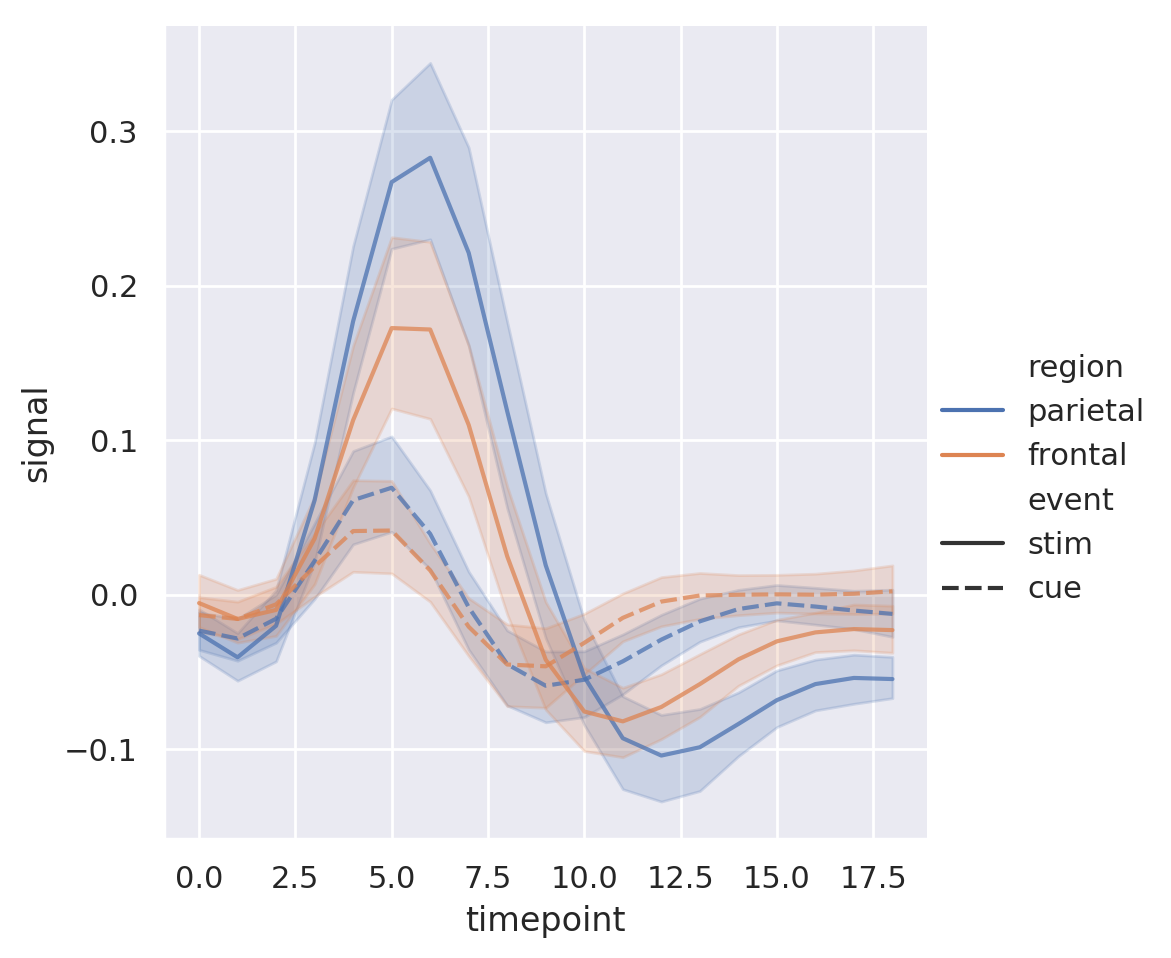

In [110]:
sns.relplot(
    kind='line',
    data=fmri,
    x='timepoint',
    y='signal',
    hue='region',
    style='event',
    alpha=.75,
);

### Categorical plots

We'll exemplify on the same, `tips` dataset

#### Between categories

The x axis is categorical, so points are grouped together and are jittered a little as to not overlap, but still show the amount of points in each category/total bill segment. This is called a swarmplot:

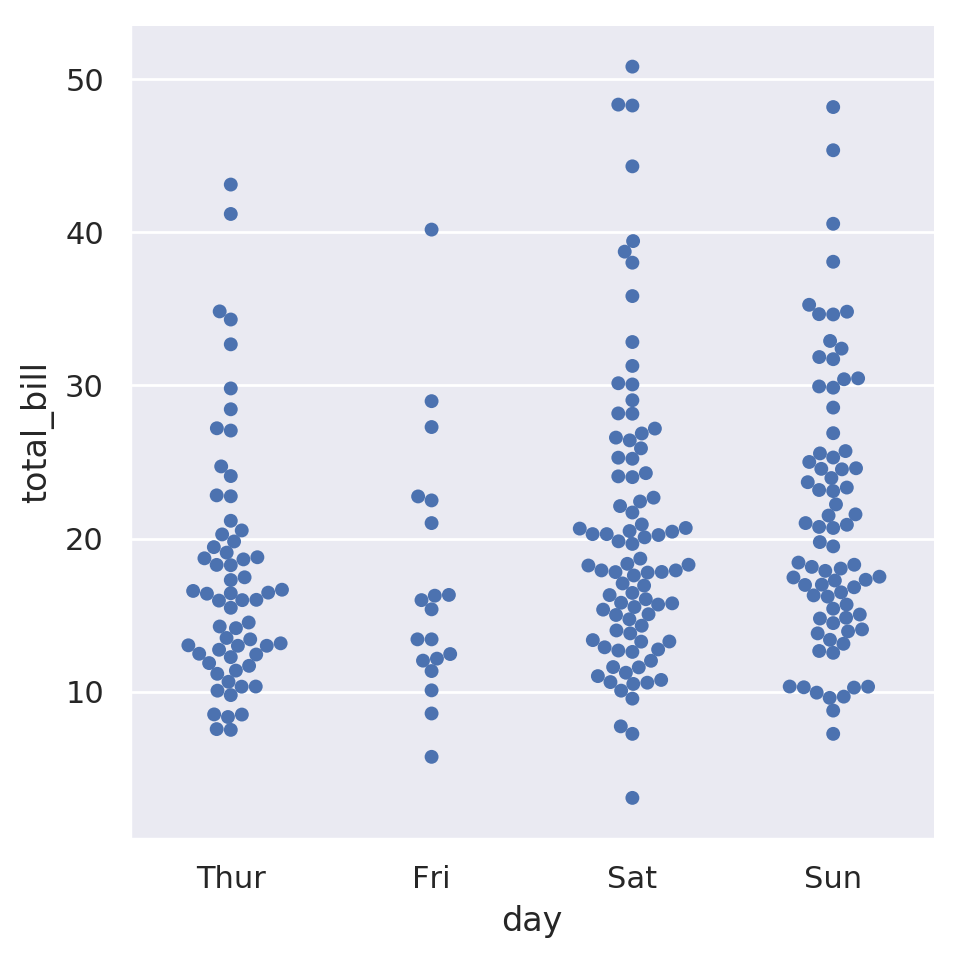

In [111]:
sns.catplot(x='day', y='total_bill', kind='swarm', data=tips, color='C0');

Show additional information:

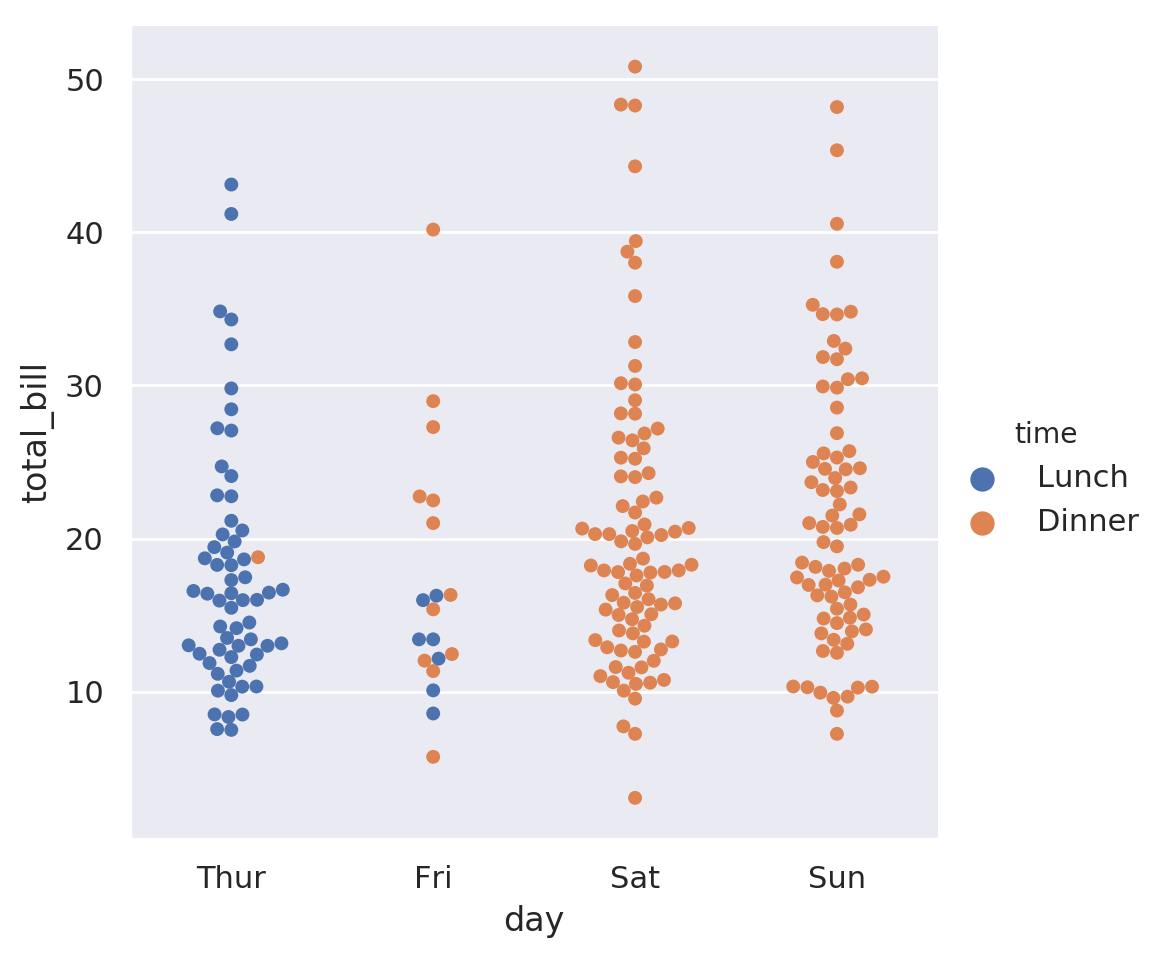

In [112]:
sns.catplot(
    kind='swarm',
    data=tips,
    x='day',
    y='total_bill',
    hue='time',
);

#### Distribution

Boxplot: the box shows the three quartiles, and whiskers extend to show the smallest and largest values, excepting outliers which are plotted separatedly

The three quartiles are:
 1. lower quartile (25% of elements are less than it)
 2. median (50% of elements are less than it)
 3. upper quartile (75% elements are less than it)
 
A point is considered an outlier if it is farther than 1.5 IQR from the lower and upper quartiles.
IQR, the inter-quartile range, is simply the distance between the lower and upper quartiles.

In [113]:
tips.groupby('day').total_bill.describe()

count       mean       std   min      25%    50%      75%    max
day                                                                   
Thur   62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11
Fri    19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17
Sat    87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81
Sun    76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17

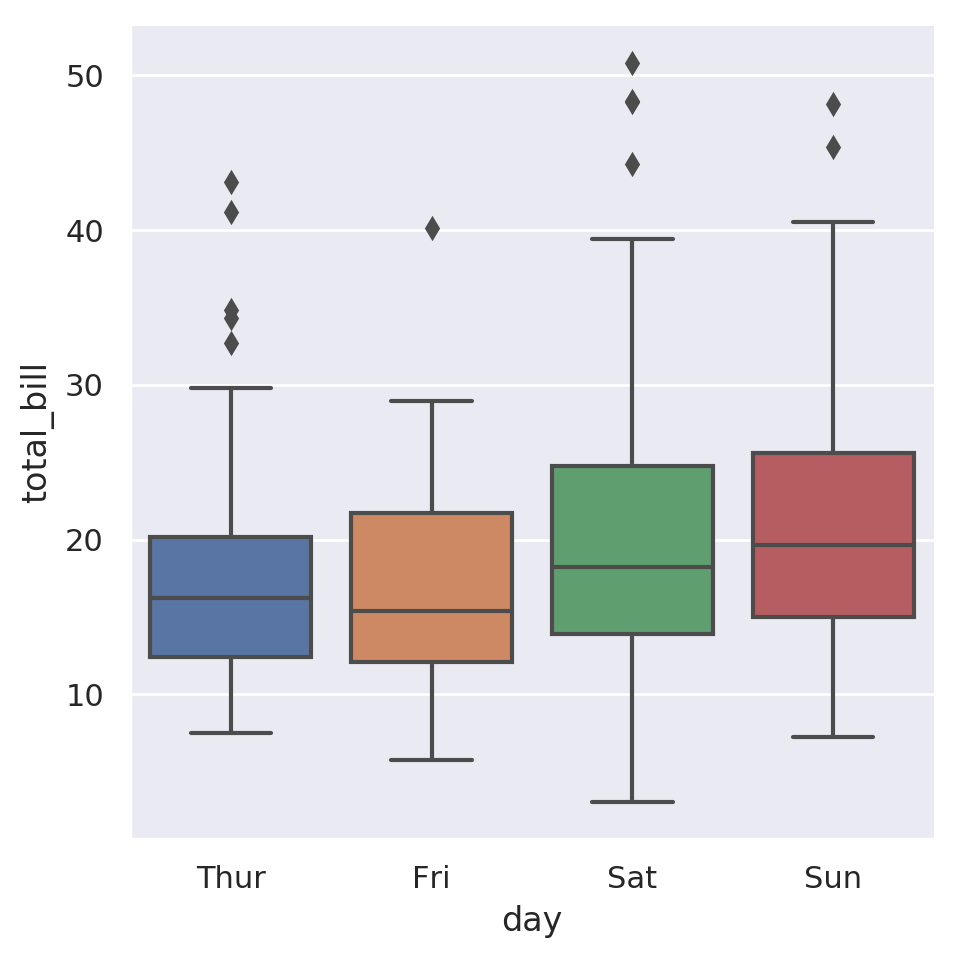

In [114]:
sns.catplot(kind='box', data=tips, x='day', y='total_bill');

Similar to the boxplot, but shows more information about the distribution. Instead of the quartiles and ranges, it shows a KDE. Think of it as a continuous histogram. Its shape allows it to show data for two types of observations for each x-axis categorical value:

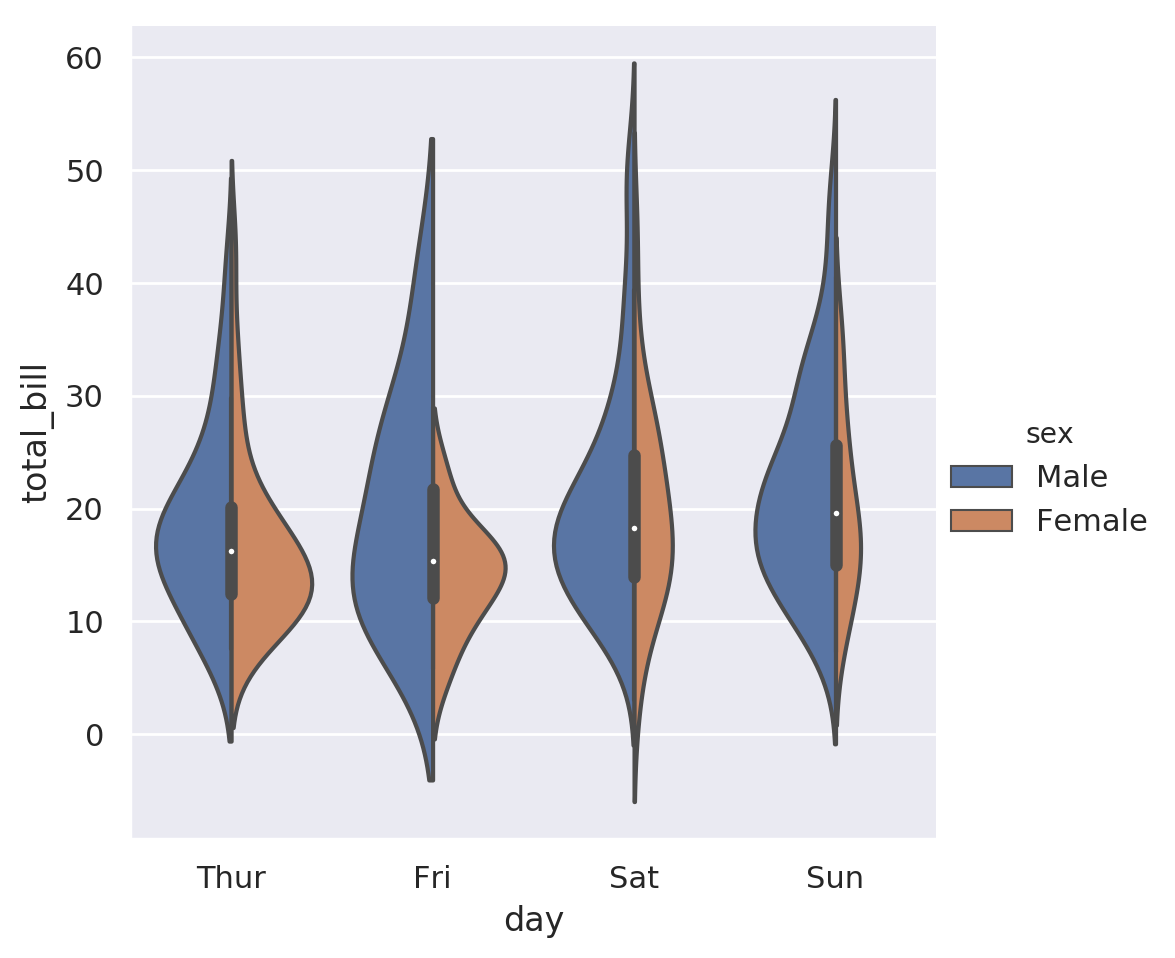

In [115]:
sns.catplot(
    kind='violin',
    split=True,
    
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',
    scale='count',
);

The width of each KDE shows the amount of observations falling in that segment

### Distributions

We'll exemplify on the famous `iris` dataset, containing measurements of various species of flowers:

In [116]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [117]:
len(iris)

150

In [118]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

#### Univariate

A **histogram** (the columns) shows how many observations fall in each _bin_.

A **KDE**, Kernel Density Estimation, fits a probability density function over the distribution. You can think of it as a continuous approximation of the histogram.

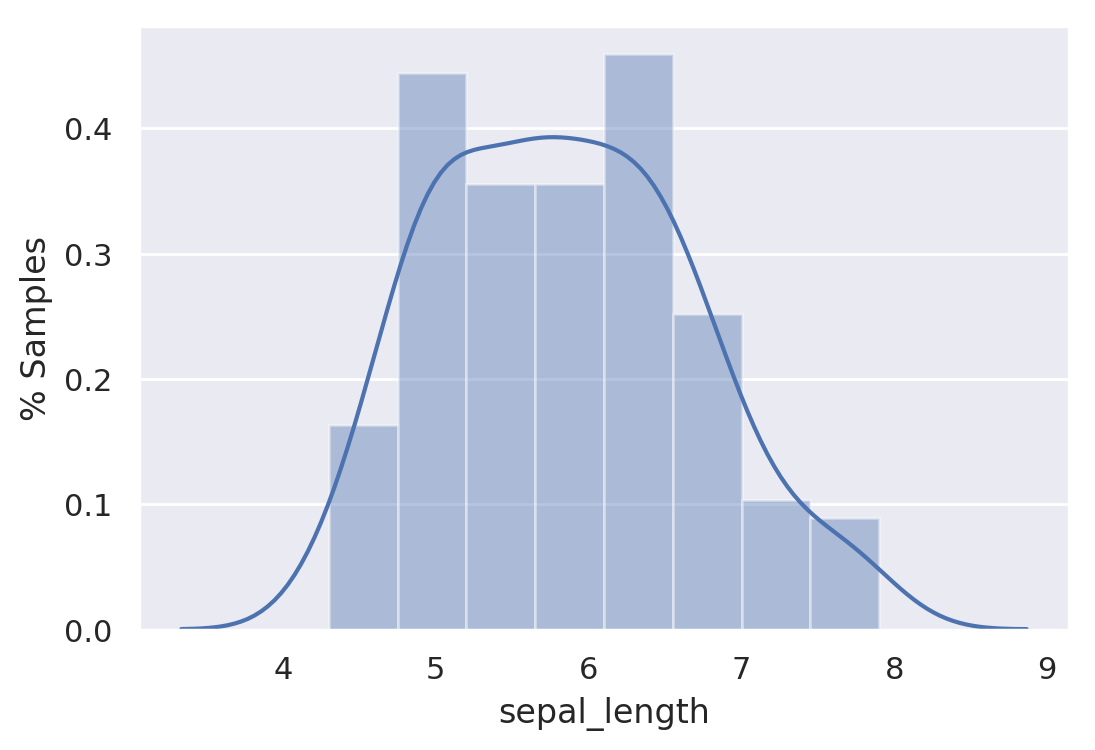

In [119]:
sns.distplot(iris.sepal_length)
plt.gca().xaxis.grid(False)
plt.ylabel('% Samples');

**ℹ️ Tip**: It seems like our distribution is made up of multiple composing distributions. Since the data comes from natural phenomena, we expect it to be somewhat normally shaped. Plotting the KDE for each species reveals the underlying distributions:

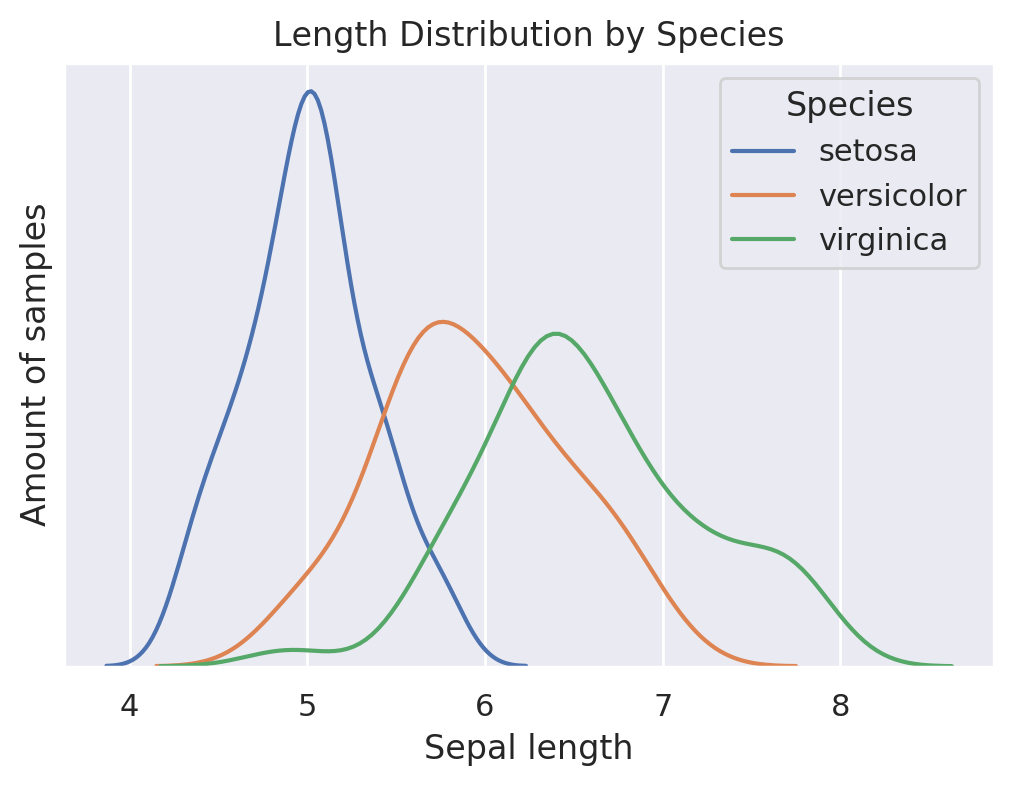

In [120]:
for species, sub_df in iris.groupby('species'):
    sns.kdeplot(sub_df.sepal_length, label=species)

plt.legend(title='Species')
plt.xlabel('Sepal length')
plt.ylabel('Amount of samples')
plt.yticks([])
plt.title('Length Distribution by Species');

#### Bivariate

Scatterplot in the center with univariate histograms on the sides:

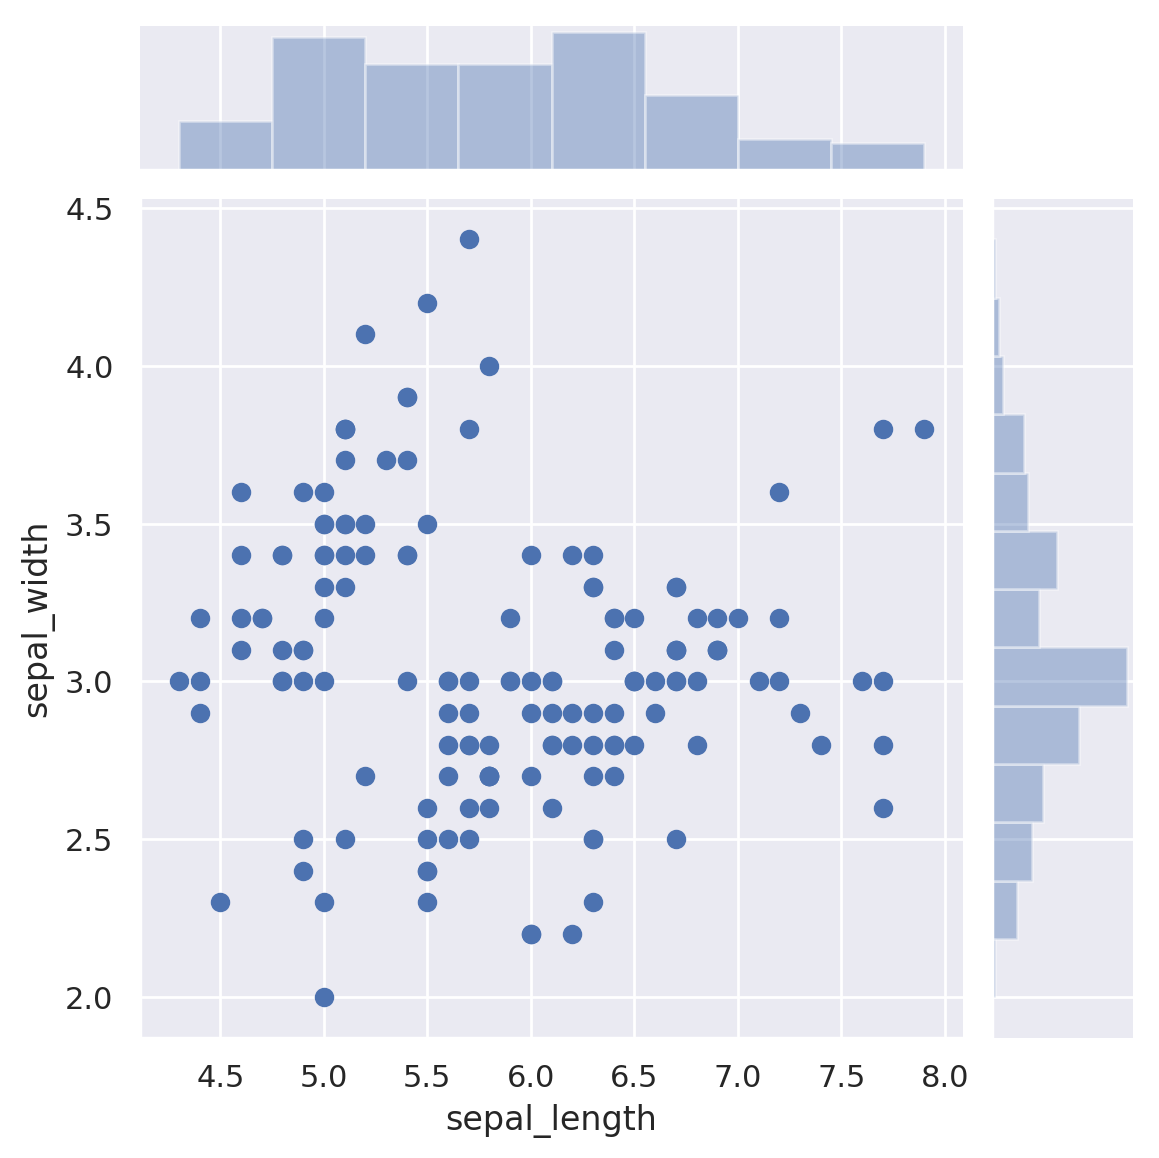

In [121]:
sns.jointplot(data=iris, x='sepal_length', y='sepal_width');

Bivariate (2D) analogous of KDE:

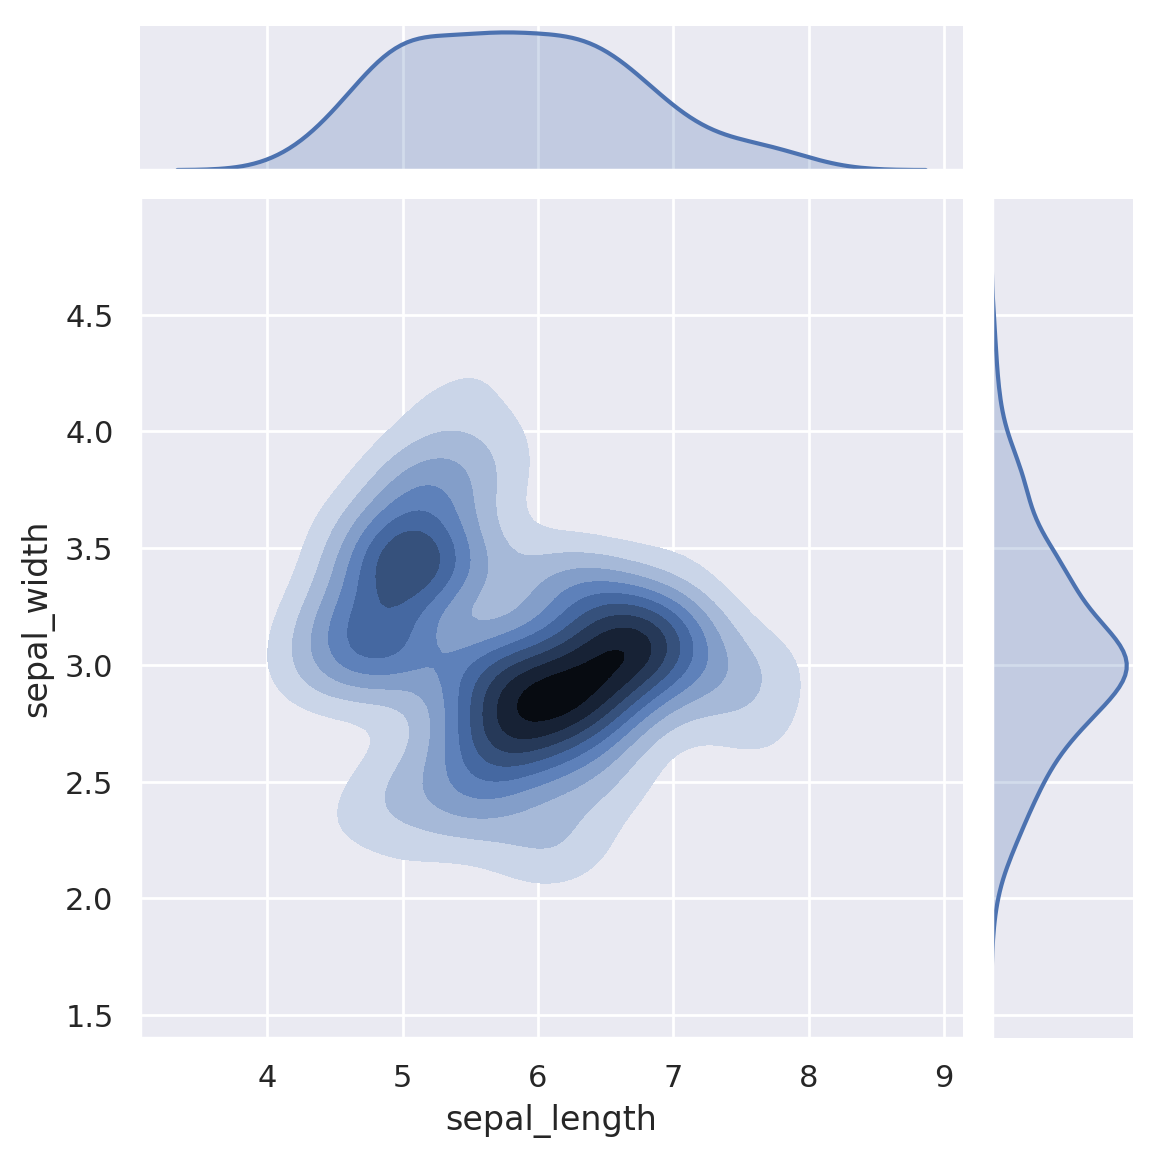

In [122]:
sns.jointplot(kind='kde', data=iris, x='sepal_length', y='sepal_width', shade_lowest=False);

Similarly, we can decompose the distributions:

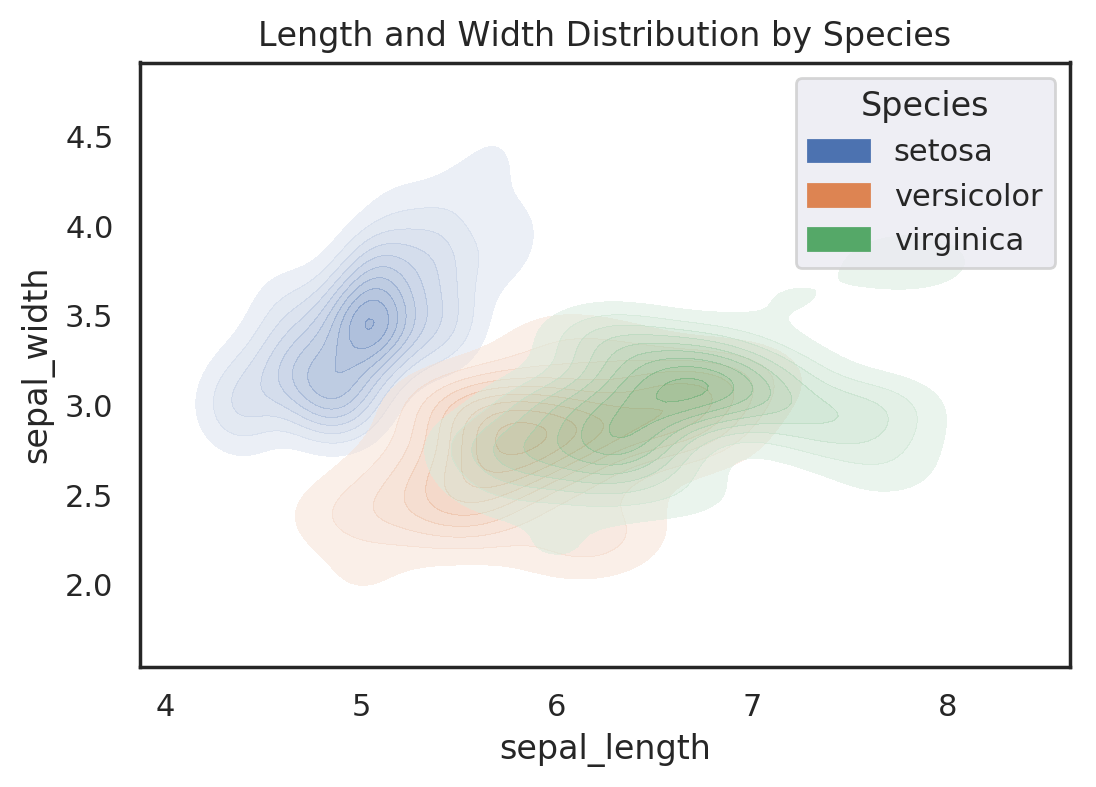

In [123]:
with sns.axes_style('white'):
    for species, sub_df in iris.groupby('species'):
        sns.kdeplot(sub_df.sepal_length, sub_df.sepal_width,  label=species, 
                    shade=True, shade_lowest=False, alpha=.5)

plt.legend(title='Species')
plt.title('Length and Width Distribution by Species');

More than two variables: just have multiple pairwise plots

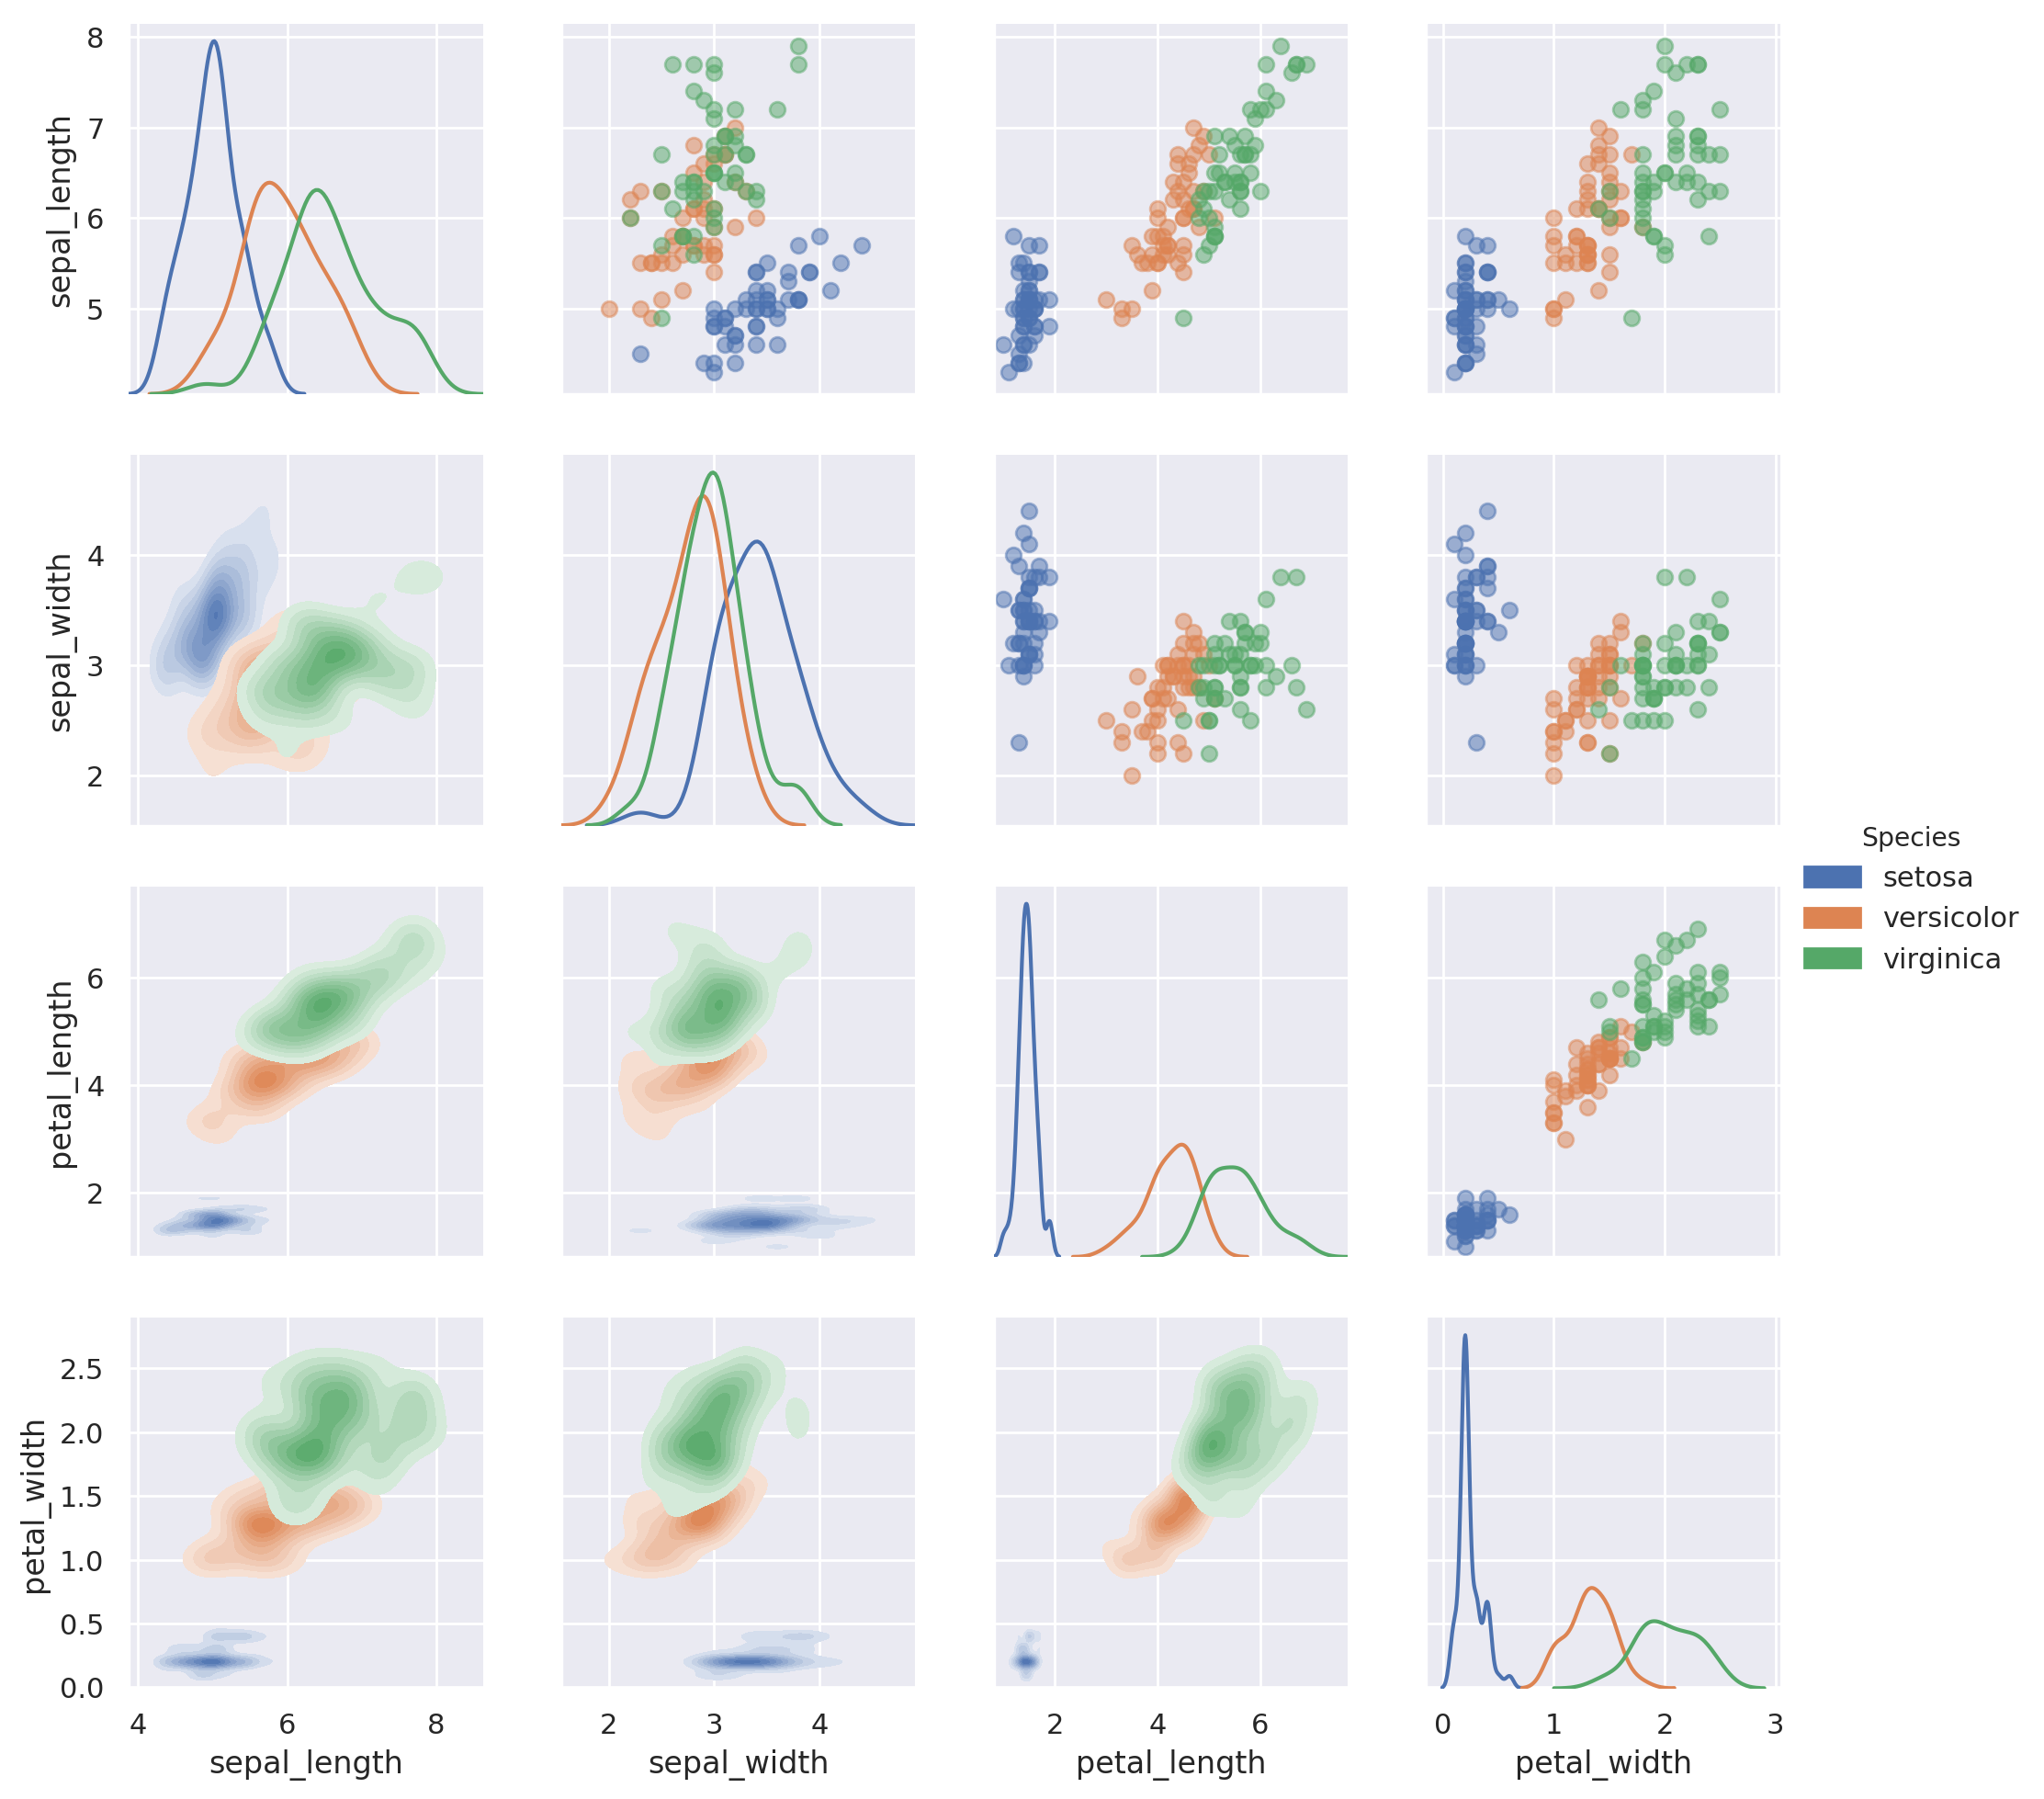

In [124]:
g = sns.PairGrid(iris, diag_sharey=False, hue='species')

g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False)

g.add_legend(title='Species');

#### Linear relationships

Best-fit line and confidence interval:

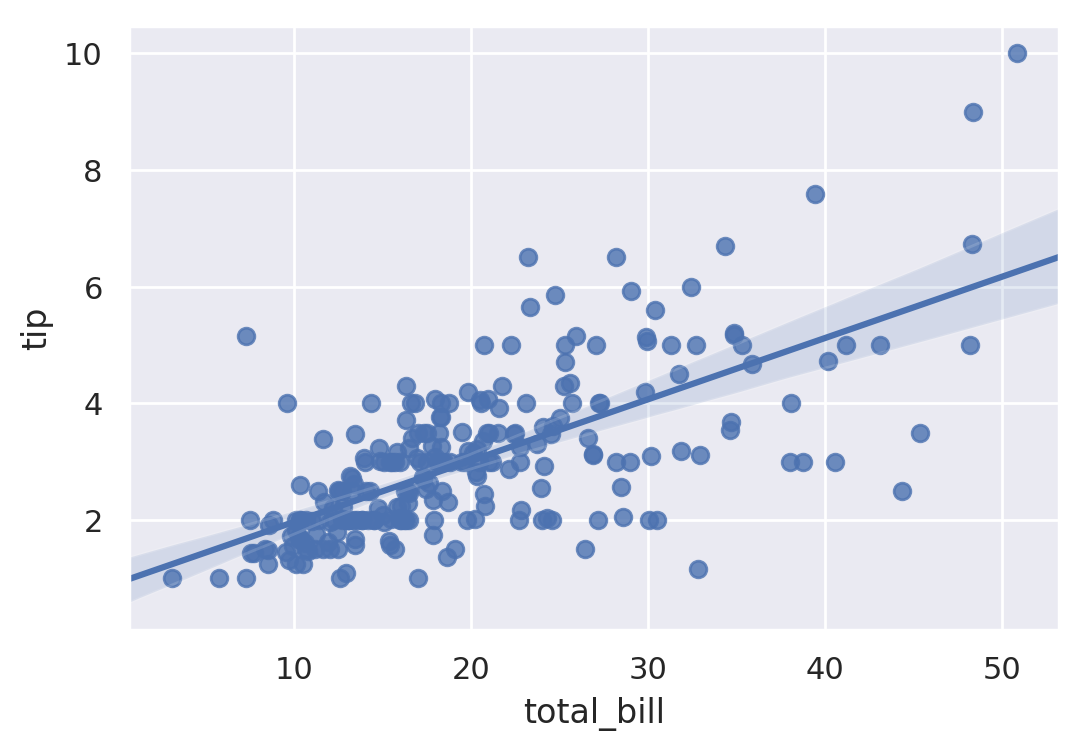

In [125]:
sns.regplot(data=tips, x='total_bill', y='tip');

Show histograms on the sides:

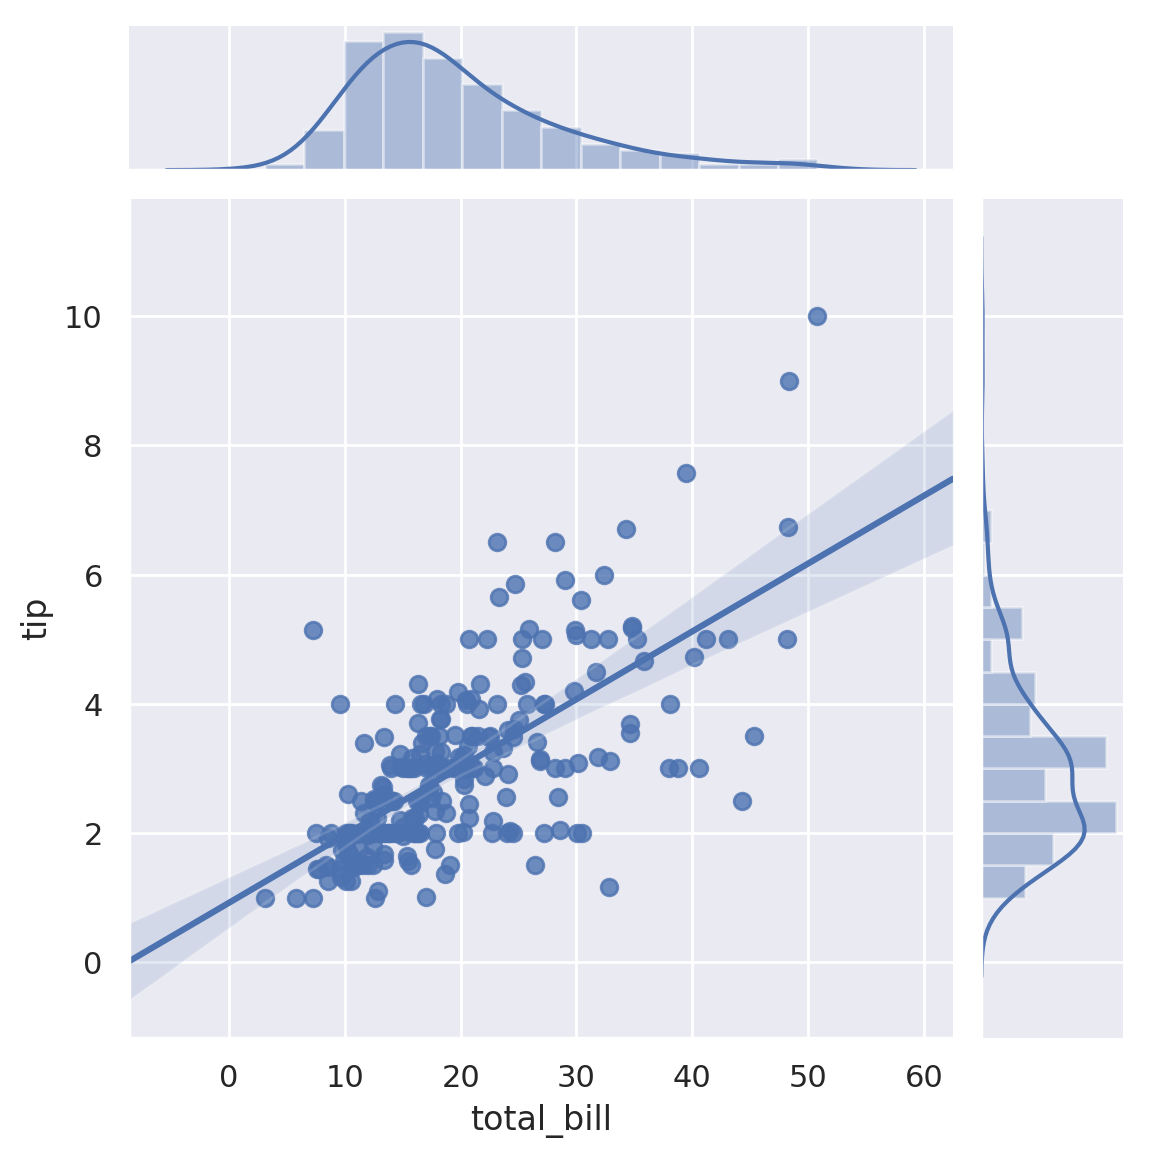

In [126]:
sns.jointplot(kind='reg', data=tips, x='total_bill', y='tip');

#### Heatmaps

We'll use the `flights` dataset, which contains the number of passagers for some flights over a period of time:

In [127]:
flights = sns.load_dataset('flights').pivot('month', 'year', 'passengers')

In [128]:
flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

Present data in three dimensions. The z-axis (color intensity) represents the number of passengers:

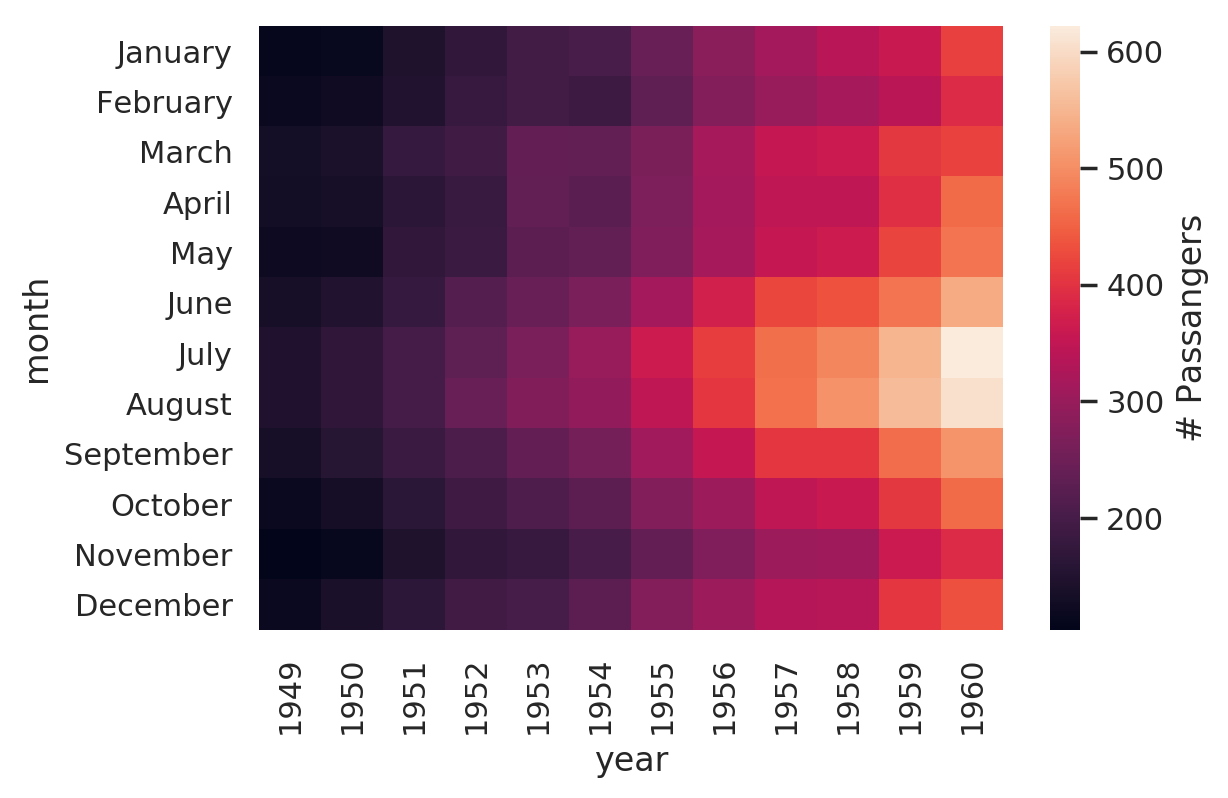

In [129]:
sns.heatmap(flights, cbar_kws=dict(label='# Passangers'));

**ℹ️ Tip**: it is intuitive to represent larger values by darker colors:

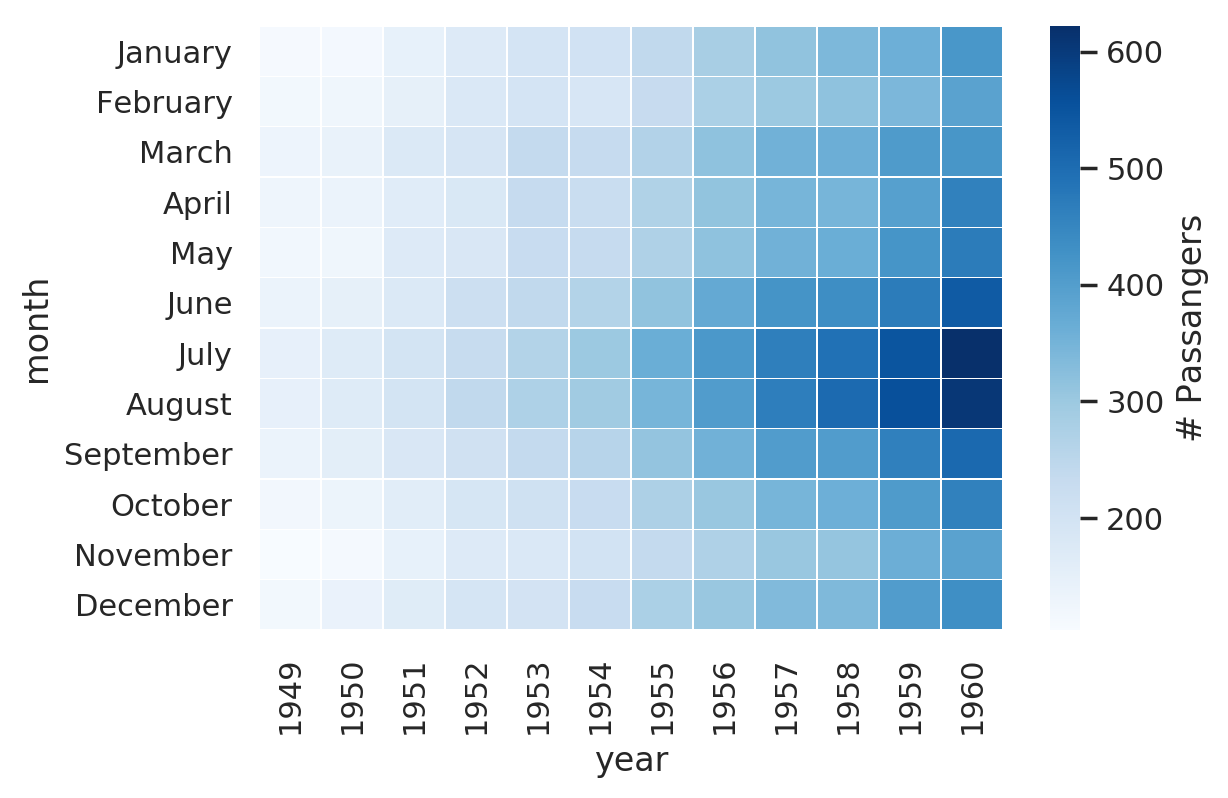

In [130]:
sns.heatmap(
    flights, 
    cbar_kws=dict(label='# Passangers'),
    cmap='Blues',
    lw=.1,
);

**ℹ️ Tip**: reverse any colormap by appending `_r` to its name.

Other sequential colormaps:

![pic](https://i.imgur.com/oqfPvJX.png)

---

Sometimes you have diverging data, such as the correlation: two variables can be correlated either positively (both increase and decrease at the same time) or negatively (when one increases, the other decreases). So we adapt to a diverging colormap.

In [ ]:
crashes = sns.load_dataset('car_crashes')
crashes.head()

In [ ]:
corr = crashes.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask=mask,
                     cbar_kws=dict(label='Correlation'),
                     cmap='RdYlGn', 
                     center=0, #vmin=-.5,
                     annot=True, 
                     fmt='.1f', 
                     lw=1,
                     square=True)

Other diverging colormaps:

![pic](https://i.imgur.com/9H9J71j.png)

**ℹ️ Tip**: see the rest of available colormaps and color palettes: [matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html), [seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html). Use tools such as [Color Brewer](http://colorbrewer2.org) to help pick color schemes. [Adobe Color Wheel](https://color.adobe.com/create/color-wheel/) is a good tool for general-purpose palette selection. Online [palette generators](https://coolors.co/app) make exploring colors easy.

---

Set the syle back to the original Matplotlib defaults:

In [147]:
sns.reset_orig()

/Users/stefan/.virtualenvs/viz-workshop/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/stefan/.virtualenvs/viz-workshop/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


## Pandas

The average daily temperature from Jan 2018 to Jan 2019, as reported by AccuWeather:

In [85]:
weather = pd.read_csv('example_files/weather.csv')
weather.head()

month  day  Los Angeles  New York City
0      1    1           48             33
1      1    2           50             39
2      1    3           52             38
3      1    4           56             49
4      1    5           66             35

In [87]:
month_names = 'January February March April May June July August September Octomber November December'.split()
cities = ['New York City', 'Los Angeles']

### Plotting Shortcuts

Pandas DataFrames integrates directly with Matplotlib, providing convenient plotting shortcuts:

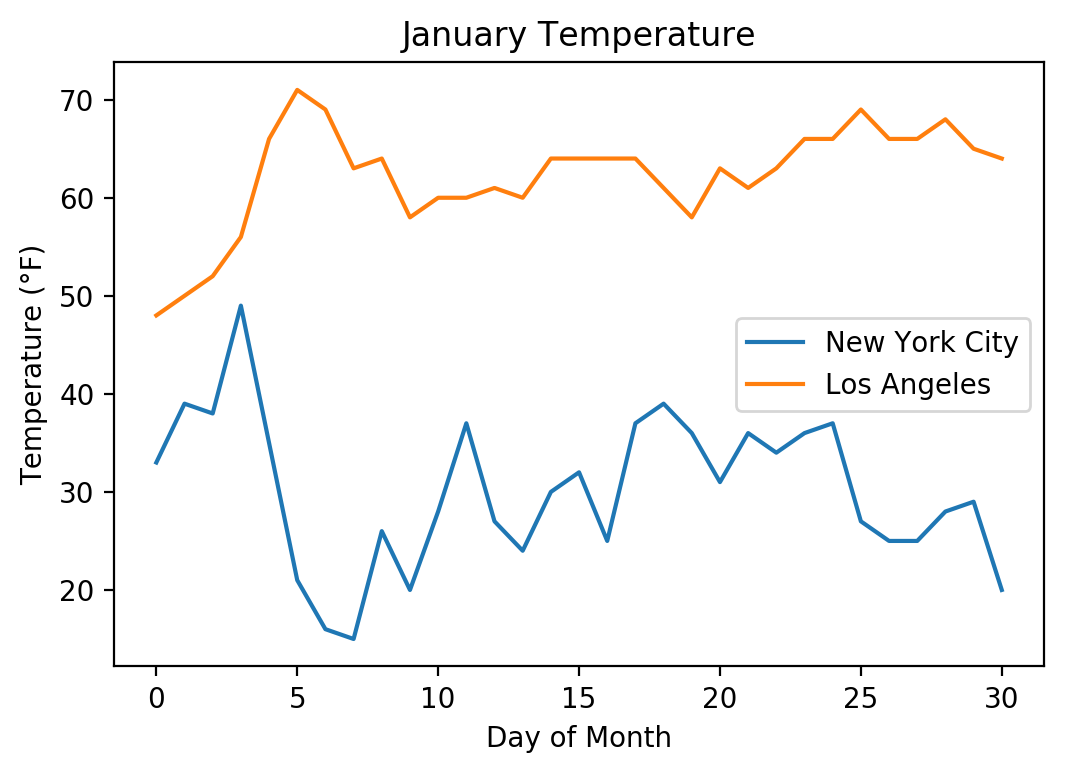

In [88]:
weather[weather.month == 1][cities].plot()

# continue customizing the chart
plt.title('January Temperature')
plt.xlabel('Day of Month')
plt.ylabel('Temperature (°F)');

They make labeling, grouping and other tedious tasks easier:

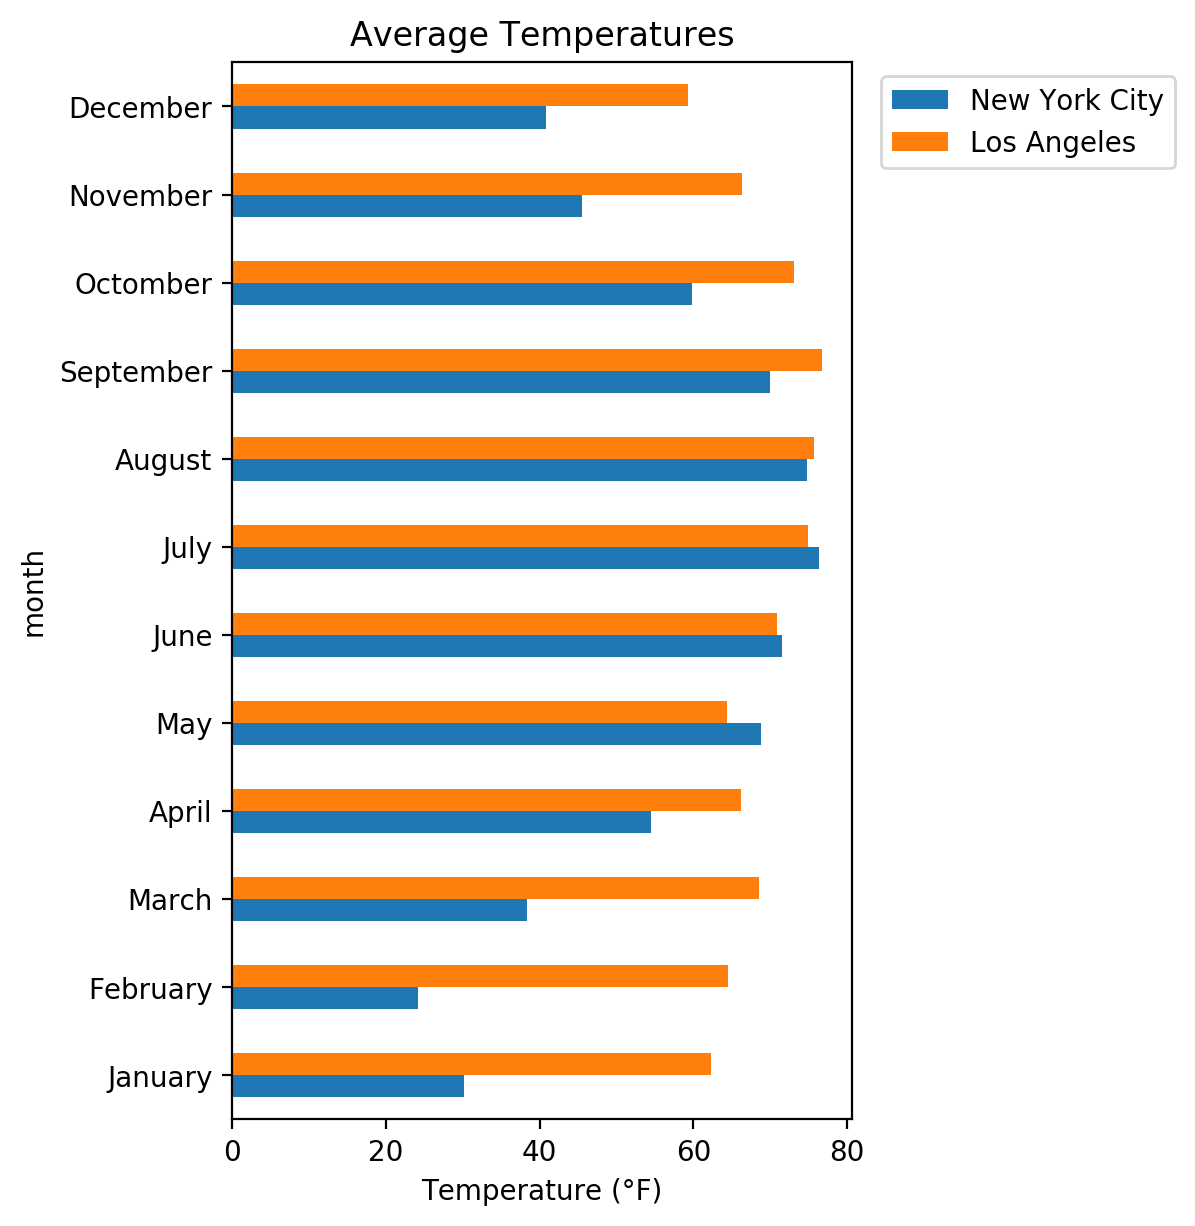

In [96]:
weather.groupby('month')[cities].mean().plot(
    kind='barh',  # horizontal bar chart
    figsize=(4, 7),
    title='Average Temperatures',
)

plt.gca().set_yticklabels(month_names)
plt.gca().legend(bbox_to_anchor=(1.025, 1))
plt.xlabel('Temperature (°F)');

Most non-specialty chart types are supported:

In [ ]:
weather['Los Angeles'].plot(kind='hist')

plt.title('Year-long Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('#Days observed');

**ℹ️ Tip**: [read more](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) about supported chart types and options

### Table Styling

Lightweight visualizations can also be incorporated directly inside tables

In [110]:
df = pd.DataFrame(np.random.randn(7, 3), columns=list('ABC'))
df.iloc[1, 1] = np.nan

df

A         B         C
0  0.307647  1.194668  0.167843
1  0.700578       NaN  0.188215
2 -0.375595 -1.379757  0.111629
3 -0.905895  0.159518  0.683766
4  0.763182 -0.999877 -0.294971
5  0.481278  0.531673  0.804150
6 -0.279108 -2.443601  0.494705

Set a caption for your table:

In [111]:
df.style.set_caption('Example Data')

Modify the precision:

In [112]:
df.round(3)

A      B      C
0  0.308  1.195  0.168
1  0.701    NaN  0.188
2 -0.376 -1.380  0.112
3 -0.906  0.160  0.684
4  0.763 -1.000 -0.295
5  0.481  0.532  0.804
6 -0.279 -2.444  0.495

Set global options:

In [113]:
pd.set_option('precision', 2)

**ℹ️ Tip**: [read more](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) about Pandas options

---

Change the style of specific elements:

In [114]:
df.style.highlight_null()

Restrict to only a subset of rows/columns:

In [115]:
df.style.highlight_max(subset=['A', 'B'], axis=0)

Arbitrary functions and function chaining:

In [116]:
def highlight_negatives(val):
    """ Make negative values bold red """
    color = 'red' if val < 0 else 'black'
    weight = 'bold' if val < 0 else 'normal'
    return f'color: {color}; font-weight: {weight}'  # css syntax

In [117]:
df.style\
    .set_precision(3)\
    .applymap(highlight_negatives)

---

Even inline charts:

In [118]:
df.style.bar(subset='C')

In [119]:
df.style.background_gradient(cmap='Greens')

/Users/stefan/.virtualenvs/viz-workshop/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


**ℹ️ Tip**: read more about [table styling](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

**ℹ️ Tip**: watch a [short animation](http://i.imgur.com/ZY8dKpA.gif) on (slightly overdone) table styling

## Other Packages

While Matplotlib is the most widely used library (seconded by Seaborn), there are many other ones, most with overlapping functionality (line, bar charts etc). But there are also those that offer specific kinds of visualizations

### Venn Diagrams

Show logical relations between a finite collection of sets:

In [ ]:
from matplotlib_venn import venn2

In [ ]:
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'));

### Joyplots

Joyplots show distributions over an ordinal variable or discretized time:

In [123]:
from joypy import joyplot

**👾 Trivia**: they got their name from Joy Division's [album](https://itunes.apple.com/us/album/unknown-pleasures-remastered/544363171) that used such a plot on as their cover. Otherwise known as a ridgeplot. More recently popularized by Tensorflow's display of weights distributions over time.

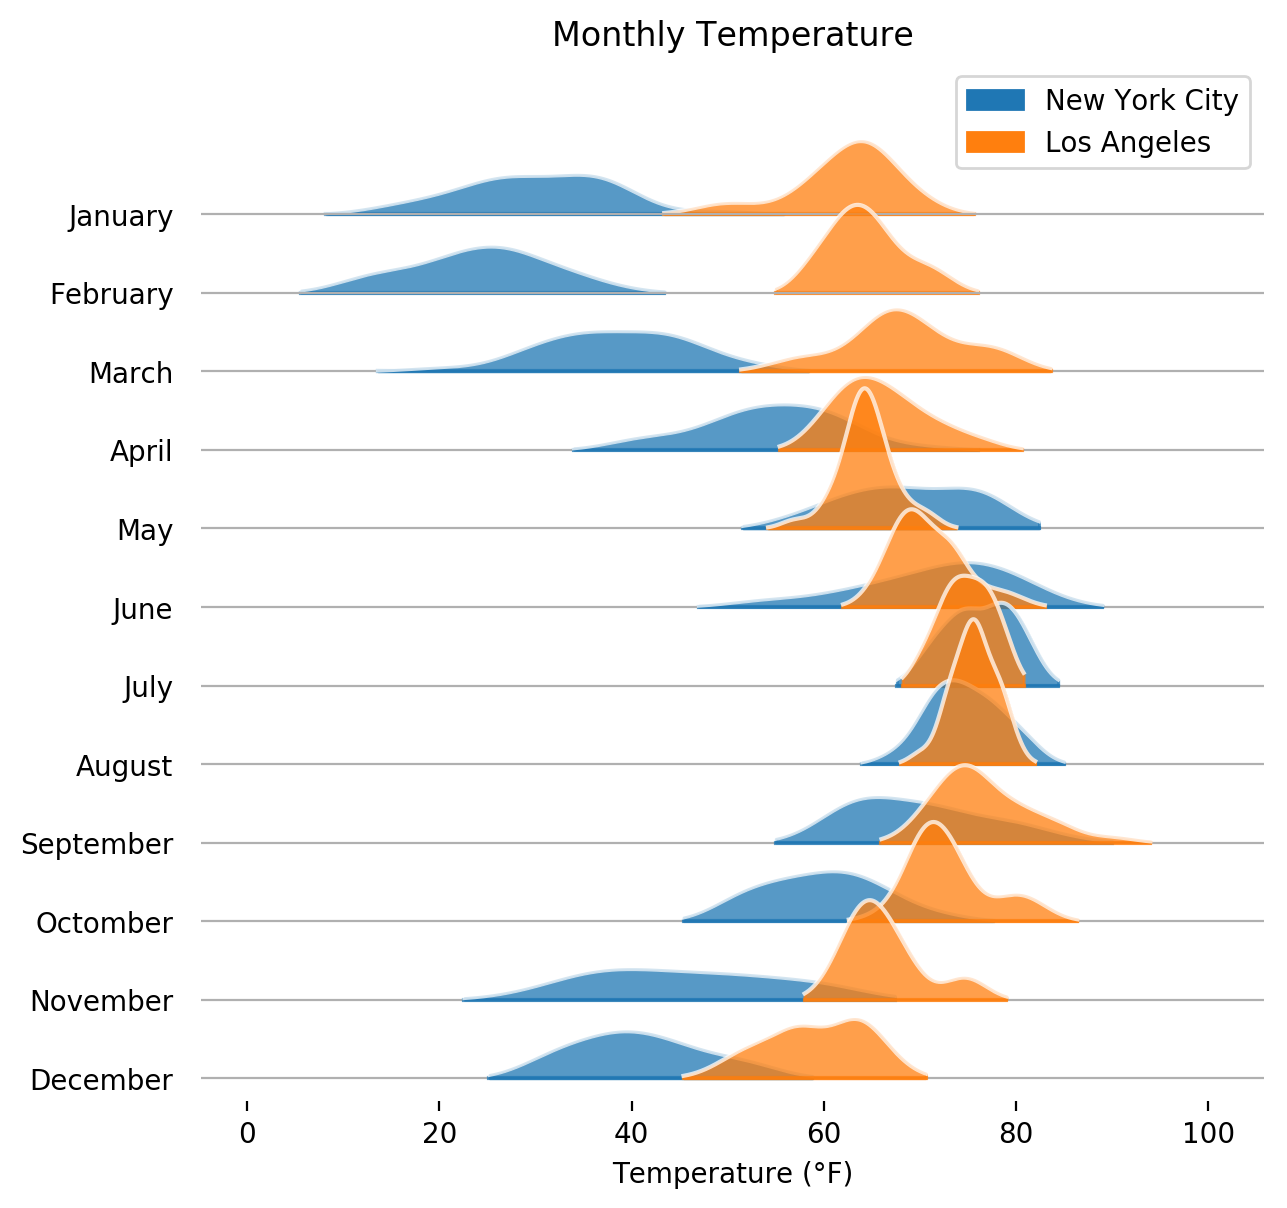

In [124]:
fig, axes = joyplot(
    weather, by='month', column=['New York City', 'Los Angeles'],
    alpha=.75, range_style='own', grid='y', linecolor='white', 
    figsize=(6, 6), title='Monthly Temperature', legend=True,
)

axes[-1].set_xlabel('Temperature (°F)')
for month, ax in zip(month_names, axes):
    ax.set_yticklabels([month])

### Network Graphs

NetworkX is the de-facto library for storing graphs

In [165]:
import networkx as nx

Provides simple plotting:

/Users/stefan/.virtualenvs/viz-workshop/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


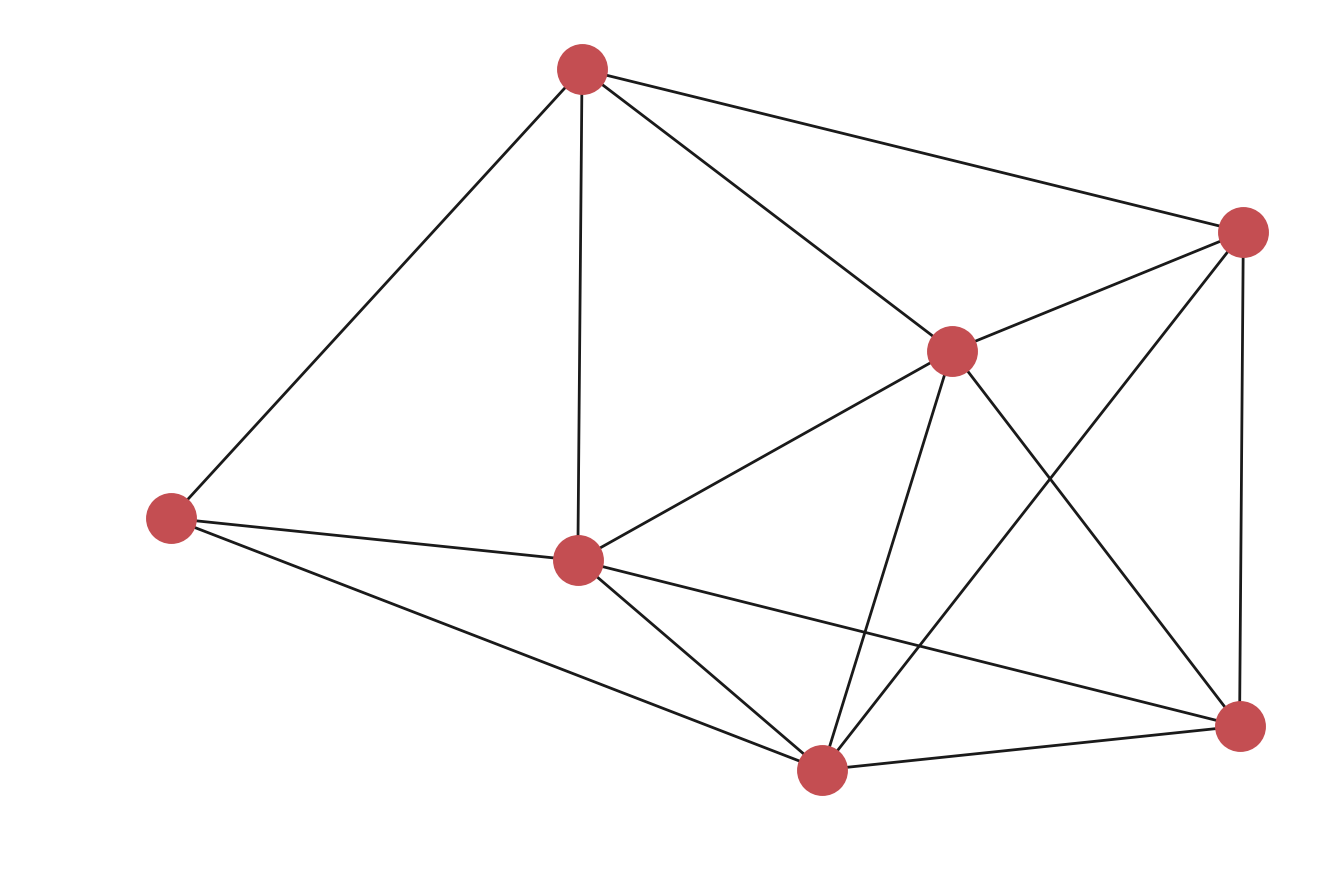

In [121]:
G = nx.gnm_random_graph(7, 15)
nx.draw(G)

But also complex customizations:

In [462]:
%%time
import requests
# source: http://evelinag.com/blog/2015/12-15-star-wars-social-network/index.html#.XG0a7KeZPRZ
r = requests.get('https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/networks/starwars-episode-1-interactions-allCharacters.json')
d = r.json()

CPU times: user 14.1 ms, sys: 1.7 ms, total: 15.8 ms
Wall time: 102 ms


In [463]:
G = nx.Graph()
G.add_nodes_from((n['value'], n) 
                 for n in d['nodes'])
G.add_weighted_edges_from([(n['source'], n['target'], n['value']) 
                           for n in d['links'] 
                           if n['source'] in G.nodes and n['target'] in G.nodes])

In [580]:
# data from Wookieepedia
G.add_nodes_from([
    (33, {'affiliation': 'Republic', 'species': 'mechanical'}),  # r2-d2
    (6 , {'affiliation': 'Republic', 'species': 'mechanical'}),  # bravo 2
    (4 , {'affiliation': 'Republic', 'species': 'mechanical'}),  # bravo 3
    (31, {'affiliation': 'Republic', 'species': 'human'}),  # padme
    (7 , {'affiliation': 'Republic', 'species': 'non-human'}),  # yoda    
    
    (19, {'affiliation': 'Empire', 'species': 'human'}),  # nute
    (3 , {'affiliation': 'Empire', 'species': 'human'}),  # organa
    (14, {'affiliation': 'Empire', 'species': 'human'}),  # emperor
    (5 , {'affiliation': 'Empire', 'species': 'human'}),  # ceel

    (11, {'affiliation': 'Neutral', 'species': 'human'}),  # shmi
    (12, {'affiliation': 'Neutral', 'species': 'human'}),  # fode
    (8 , {'affiliation': 'Neutral', 'species': 'non-human'}),  # watto
])

In [581]:
G.remove_nodes_from([node for node, val in nx.get_node_attributes(G, 'value').items() if val == 0])
G.remove_nodes_from([node for node, deg in G.degree if deg == 0])

In [582]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 13
Average degree:   2.1667


In [583]:
species2shape = {
    'mechanical': 's',  # square
    'human':      'o',  # circle
    'non-human':  '^',  # triangle
}

In [584]:
affiliation2color = {
    'Republic': 'C0',  # blue
    'Empire':   'C3',  # red
    'Neutral':  'C1',  # orange
}

/Users/stefan/.virtualenvs/viz-workshop/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


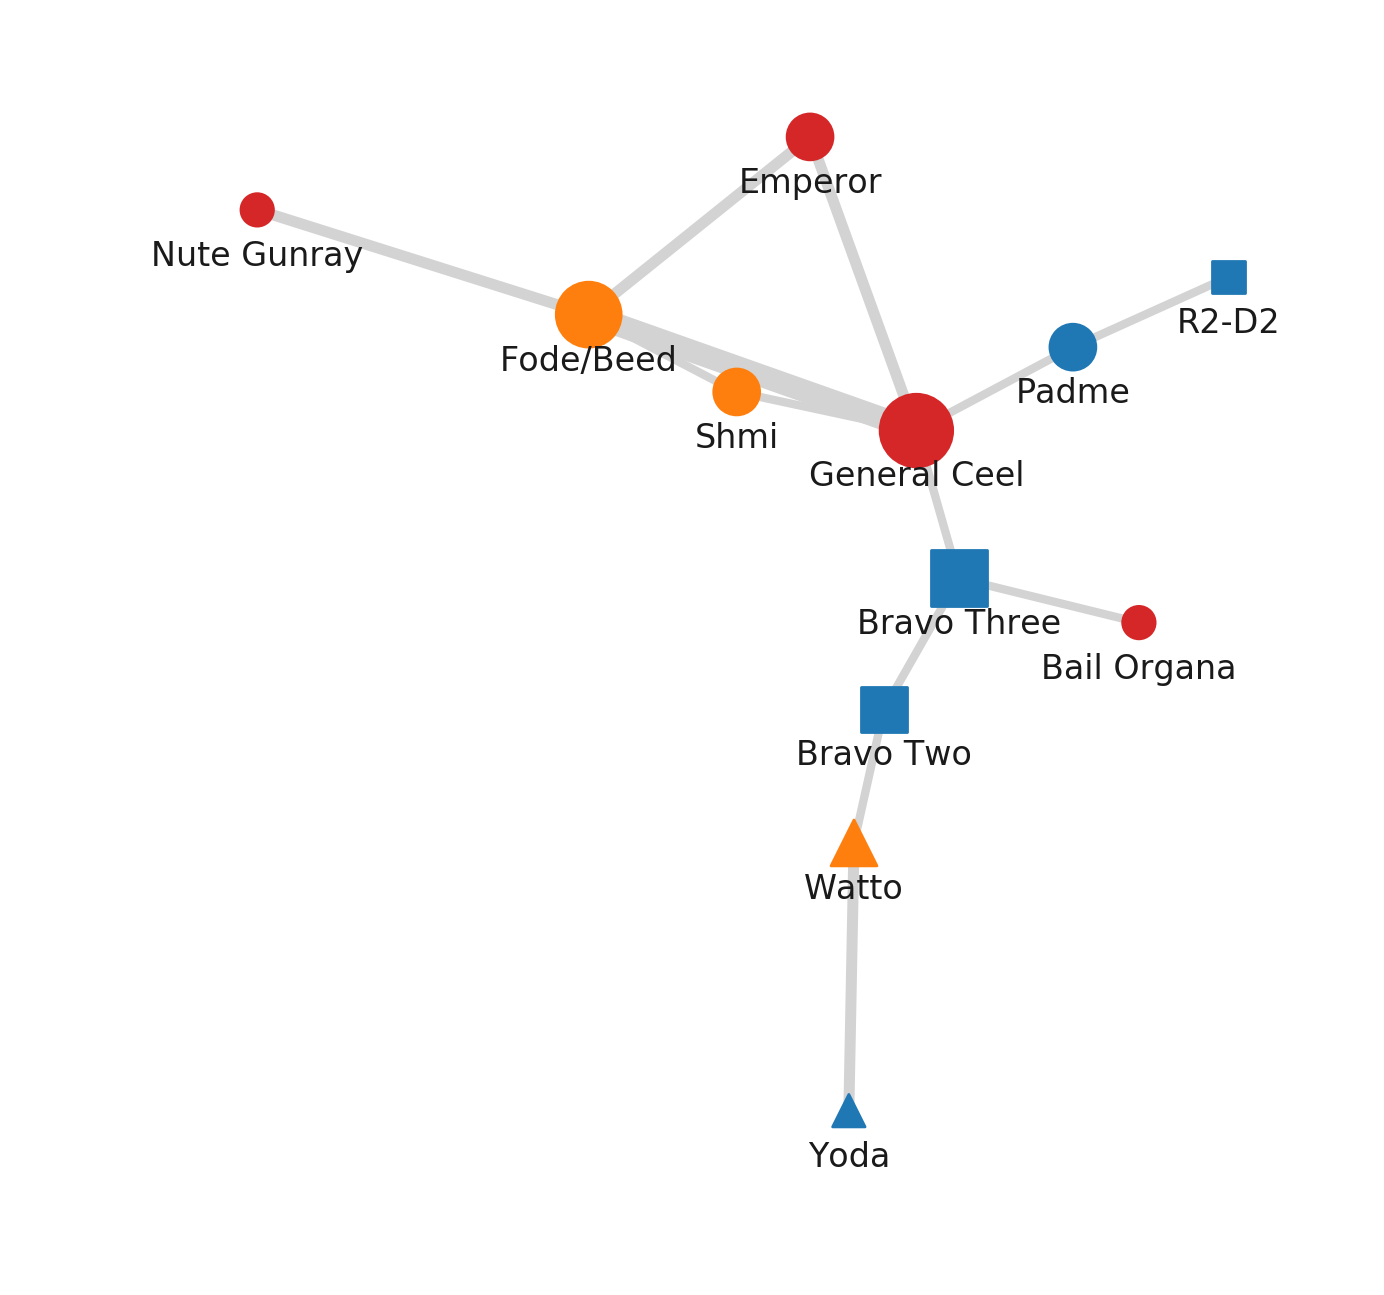

In [585]:
plt.figure(figsize=(8, 8))
pos = nx.kamada_kawai_layout(G)

""" Draw nodes """
for species, shape in species2shape.items():
    species_nodes = [node 
                     for node, s in nx.get_node_attributes(G, 'species').items() 
                     if s == species]
    node_sizes    = [c 
                     for n, c in nx.degree_centrality(G).items() 
                     if n in species_nodes]
    node_colors   = [affiliation2color[aff] 
                     for n, aff in nx.get_node_attributes(G, 'affiliation').items() 
                     if n in species_nodes]
    nx.draw_networkx_nodes(
        G, 
        pos=pos,
        nodelist=species_nodes,  # list nodes to plot
        node_size=np.array(node_sizes) * 1500,  # list size of each node, in order
        node_color=node_colors,  # list color of each node, in order
        node_shape=shape,  # a single shape for all nodes (which is why this loop is needed)
    )


""" Draw labels"""
label_pos  = {node: coords + [0, -.075]  # a bit lower than the coordinates of the node
              for node, coords in pos.items()}
label_text = {node: name.title() 
              for node, name in nx.get_node_attributes(G, 'name').items()}
nx.draw_networkx_labels(
    G, 
    pos=label_pos,  # the position of each node, as a dictionary
    labels=label_text,  # the text of each node, as a dictionary
)


""" Draw edges """
edge_widths = list(nx.get_edge_attributes(G, 'weight').values()))
nx.draw_networkx_edges(
    G, 
    pos=pos,
    width=np.array(edge_widths) ** .4 * 3,  # raise to subunitary power to atenuate the large differences
    edge_color='lightgray',
)


""" Figure settings """
# expand limits
plt.ylim(plt.ylim()[0] - .1, plt.ylim()[1] + .1)
plt.xlim(plt.xlim()[0] - .1, plt.xlim()[1] + .1)

# hide axes
plt.axis('off');

**ℹ️ Tip**: learn more about NetworkX from the [official tutorial](https://networkx.github.io/documentation/stable/tutorial.html)

todo https://flowingdata.com/2014/03/20/nba-passing-dynamics/ chord diagram

### More Types

The largest areas we haven't touched upon are interactive charts and map charts.  While this workshop focused on static charts, we can take advantage of the Jupyter environment and plot these as well. 

The most widely used library for this is [Plotly](https://plot.ly/python/). Check out these features if interested:
 - [zooming, slicing, hover information](https://plot.ly/python/line-charts/)
 - [advanced Jupyter features](https://plot.ly/python/ipython-notebook-tutorial/)
 - more chart types: 
    - [3D scatterplot](https://plot.ly/python/3d-network-graph/) (navigatable)
    - [sankey](https://plot.ly/python/parallel-categories-diagram/)
    - [choropleth](https://plot.ly/python/maps/)
    - [chord diagram](https://plot.ly/python/filled-chord-diagram/)
    - [treemap](https://plot.ly/python/treemaps/)
    - [wind rose](https://plot.ly/python/wind-rose-charts/)

### Plotly

## Further Reading

todo: official tutorials, cheatsheets
 - Matplotlib tutorials:
  - [official crash course](https://matplotlib.org/users/pyplot_tutorial.html)
  - [official, in-depth](https://matplotlib.org/tutorials/index.html)
  - [unofficial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/), based on the one [from scipy](http://scipy-lectures.org/intro/matplotlib/matplotlib.html)
 - Seaborn tutorials:
  - TODO
 - Python Data Visualization Packages: [talk](https://www.youtube.com/watch?v=FytuB8nFHPQ)
 - Python Graphs: [gallery](https://python-graph-gallery.com) (not exclusively Matplotlib/Seaborn)
 - Articles providing concise and useful tips and caveats:
  - https://www.geckoboard.com/learn/data-literacy/data-visualization-tips/
  - https://www.data-to-viz.com/caveats.html
  - https://www.columnfivemedia.com/25-tips-to-upgrade-your-data-visualization-design
  - https://www.lovesdata.com/blog/data-visualization-tips
  - https://www.tableau.com/about/blog/2016/5/5-tips-effective-visual-data-communication-54174
  - https://www.dataquest.io/blog/design-tips-for-data-viz/
 - Collections of beautiful, effective visualizations:
  - [Flowing Data](https://flowingdata.com)
  - [r/DataIsBeautiful](https://www.reddit.com/r/dataisbeautiful/top/?sort=top&t=all) (user voted)
  - [Tableau Gallery](https://public.tableau.com/en-us/s/gallery) (more intricate)
  - [The Pudding](https://pudding.cool) (visual essays)
  - [Seeing Theory](https://seeing-theory.brown.edu) (visual introduction to probability and statistics)
 - Books:
  - [Edward Tufte](https://www.edwardtufte.com/tufte/books_vdqi) (renown statistician and data visualization pioneer)
  - [How to Lie with Statistics](https://www.amazon.com/How-Lie-Statistics-Darrell-Huff/dp/0393310728) (explores mis-uses of data visualizations)
  - [Universal Principles of Design](https://www.amazon.com/Universal-Principles-Design-William-Lidwell/dp/1592530079) (pertaining to an abundance of fields and contexts, not just data visualization)